# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?      


**Seventeen (17) marketing campaigns represent the data.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import graphviz
import math
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingRandomSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, recall_score
from sklearn.metrics import auc as skl_auc
from sklearn.metrics import precision_recall_curve, average_precision_score, fbeta_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from imblearn.over_sampling import SMOTE



**Load the dataset**

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
# Verify the dataset
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**The target variable 'y' is transformed to a numeric type "0" and "1". It is found later that there are no missing values. Categorical features are encoded.**     
**As explained above that 'if the intention is to have a realistic predictive model', the column 'duration' is dropped.**

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.     


**The classification goal is to predict if a client will subscribe to a bank term deposit and determine the machine learning model that will best achieve this goal.**     
The predictions will help the marketing team to formulate a business strategy and a marketing campaign to increase bank clients subscription to term deposits.

In [4]:
# Convert the target variable 'y' to explicitly define the positive class and simplify metric interpretation
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [5]:
# Drop the column 'duration' as explained above
df = df.drop(columns=['duration'])

In [6]:
# Check the info and note the number of rows and columns, data types and any missing rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [7]:
# Verify the total missing values
total_missing_values = df.isnull().sum().sum()  # count the total number of missing values
print(f'There are {total_missing_values} total missing values.')

There are 0 total missing values.


**Descriptive Statistical Analysis of numerical features**      

A descriptive statistical analysis of numerical features is made using the describe function as follows:     
**age** favors the younger side. **campaign** numbers are mostly low. **pdays** most are in the high side. **previous** is fairly distributed. **emp.var.rate** is on the high side. **cons.price.idx** and **cons.conf.idx** are fairly distributed. **euribor3m** is on the high side. **nr.employed** is fairly distributed. **y** is highly imbalanced, the imbalance is addressed when the models are built.      
Further inferential analysis is made using histograms, boxplots, heatmaps and pairplots.

In [8]:
# Examine the descriptive statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100
y,41188.0,0.112654,0.316173,0.000,0.000,0.000,0.000,1.000


**Duplicate Rows**    
Duplicate rows are removed.

In [9]:
# Verify duplicates
duplicates = len(df[df.duplicated()])

print(f'There are {duplicates} duplicate rows.')

There are 1784 duplicate rows.


In [10]:
# Remove duplicate rows
df = df.drop_duplicates()
duplicates = len(df[df.duplicated()])

print(f'There are {duplicates} duplicate rows.')

There are 0 duplicate rows.


In [11]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null  floa

**Distribution of categorical columns**  

In [12]:
# Verify the distributions for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for i in categorical_cols:
    value_count_column = df[i].value_counts(normalize=True)
    print(f'The value count for column {value_count_column} \n')

The value count for column job
admin.           0.250558
blue-collar      0.224216
technician       0.162522
services         0.096462
management       0.071566
retired          0.042711
entrepreneur     0.035656
self-employed    0.035174
housemaid        0.026089
unemployed       0.025175
student          0.021622
unknown          0.008248
Name: proportion, dtype: float64 

The value count for column marital
married     0.605751
single      0.279083
divorced    0.113161
unknown     0.002005
Name: proportion, dtype: float64 

The value count for column education
university.degree      0.293397
high.school            0.231474
basic.9y               0.146813
professional.course    0.127347
basic.4y               0.101335
basic.6y               0.056390
unknown                0.042788
illiterate             0.000457
Name: proportion, dtype: float64 

The value count for column default
no         0.790148
unknown    0.209776
yes        0.000076
Name: proportion, dtype: float64 

The value 

**\'unknown\'** is removed from the respective columns

In [13]:
# drop 'unknown' from respective columns
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in columns:
    df = df[df[col] != 'unknown']

In [14]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29070 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29070 non-null  int64  
 1   job             29070 non-null  object 
 2   marital         29070 non-null  object 
 3   education       29070 non-null  object 
 4   default         29070 non-null  object 
 5   housing         29070 non-null  object 
 6   loan            29070 non-null  object 
 7   contact         29070 non-null  object 
 8   month           29070 non-null  object 
 9   day_of_week     29070 non-null  object 
 10  campaign        29070 non-null  int64  
 11  pdays           29070 non-null  int64  
 12  previous        29070 non-null  int64  
 13  poutcome        29070 non-null  object 
 14  emp.var.rate    29070 non-null  float64
 15  cons.price.idx  29070 non-null  float64
 16  cons.conf.idx   29070 non-null  float64
 17  euribor3m       29070 non-null  floa

**Outliers**     
Outliers are removed from numeric features using interquartile range (IQR) rule.

In [15]:
# List the numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [16]:
# Removal of outliers from numeric features using IQR
outliers_numeric_list = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
                          'euribor3m','nr.employed']
for col in outliers_numeric_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [17]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22474 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22474 non-null  int64  
 1   job             22474 non-null  object 
 2   marital         22474 non-null  object 
 3   education       22474 non-null  object 
 4   default         22474 non-null  object 
 5   housing         22474 non-null  object 
 6   loan            22474 non-null  object 
 7   contact         22474 non-null  object 
 8   month           22474 non-null  object 
 9   day_of_week     22474 non-null  object 
 10  campaign        22474 non-null  int64  
 11  pdays           22474 non-null  int64  
 12  previous        22474 non-null  int64  
 13  poutcome        22474 non-null  object 
 14  emp.var.rate    22474 non-null  float64
 15  cons.price.idx  22474 non-null  float64
 16  cons.conf.idx   22474 non-null  float64
 17  euribor3m       22474 non-null  floa

**HISTOGRAMS**     
**age** - right skewed distribution, median and mean are mid to late thirties, there's a frequency peak at early thirties     
**campaign** - the number of contacts average 2 while the maximum is 6       
**pdays** - consistent distribution, clients not previously contacted past days   
**previous** - consistent distribution, number of contacts previous to campaign     
**emp.var.rate** - the mean and median of employee variation rate is on the positive side     
**cons.price.idx** - slight left skewed distribution     
**cons.conf.idx** - tri-modal distribution, mean is in the middle mode    
**euribor3m** - highest frequency is at 5     
**nr.employed** - mean is on the high side     
**y** - confirms the high imbalance in the dataset, only a small number of bank clients subscribe

In [18]:
# Define a function to plot histograms for numeric columns
def plot_grid_histograms(df, column_list, main_title='Numeric Features Distribution Analysis'):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,25))
    fig.suptitle(main_title, fontsize=18, fontweight='bold', y=0.98)
    axes = axes.flatten()
    for i, col_name in enumerate(column_list):
        ax = axes[i]
        sns.histplot(df[col_name], kde=True, ax=ax)
        col_mean = df[col_name].mean()
        col_median = df[col_name].median()
        ax.axvline(col_mean, color='red', linestyle='--', label='Mean')
        ax.axvline(col_median, color='green', linestyle='-', label='Median')
        ax.set_title(f'Distribution of {col_name}', fontsize=12, pad=10)
        ax.set_xlabel('Value Range', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.legend(fontsize=8)
    for j in range(i+1, len(axes)):
        axes[j].set_axis_off()
    plt.tight_layout(rect=[0,0.03,1,0.97])
    plt.show()

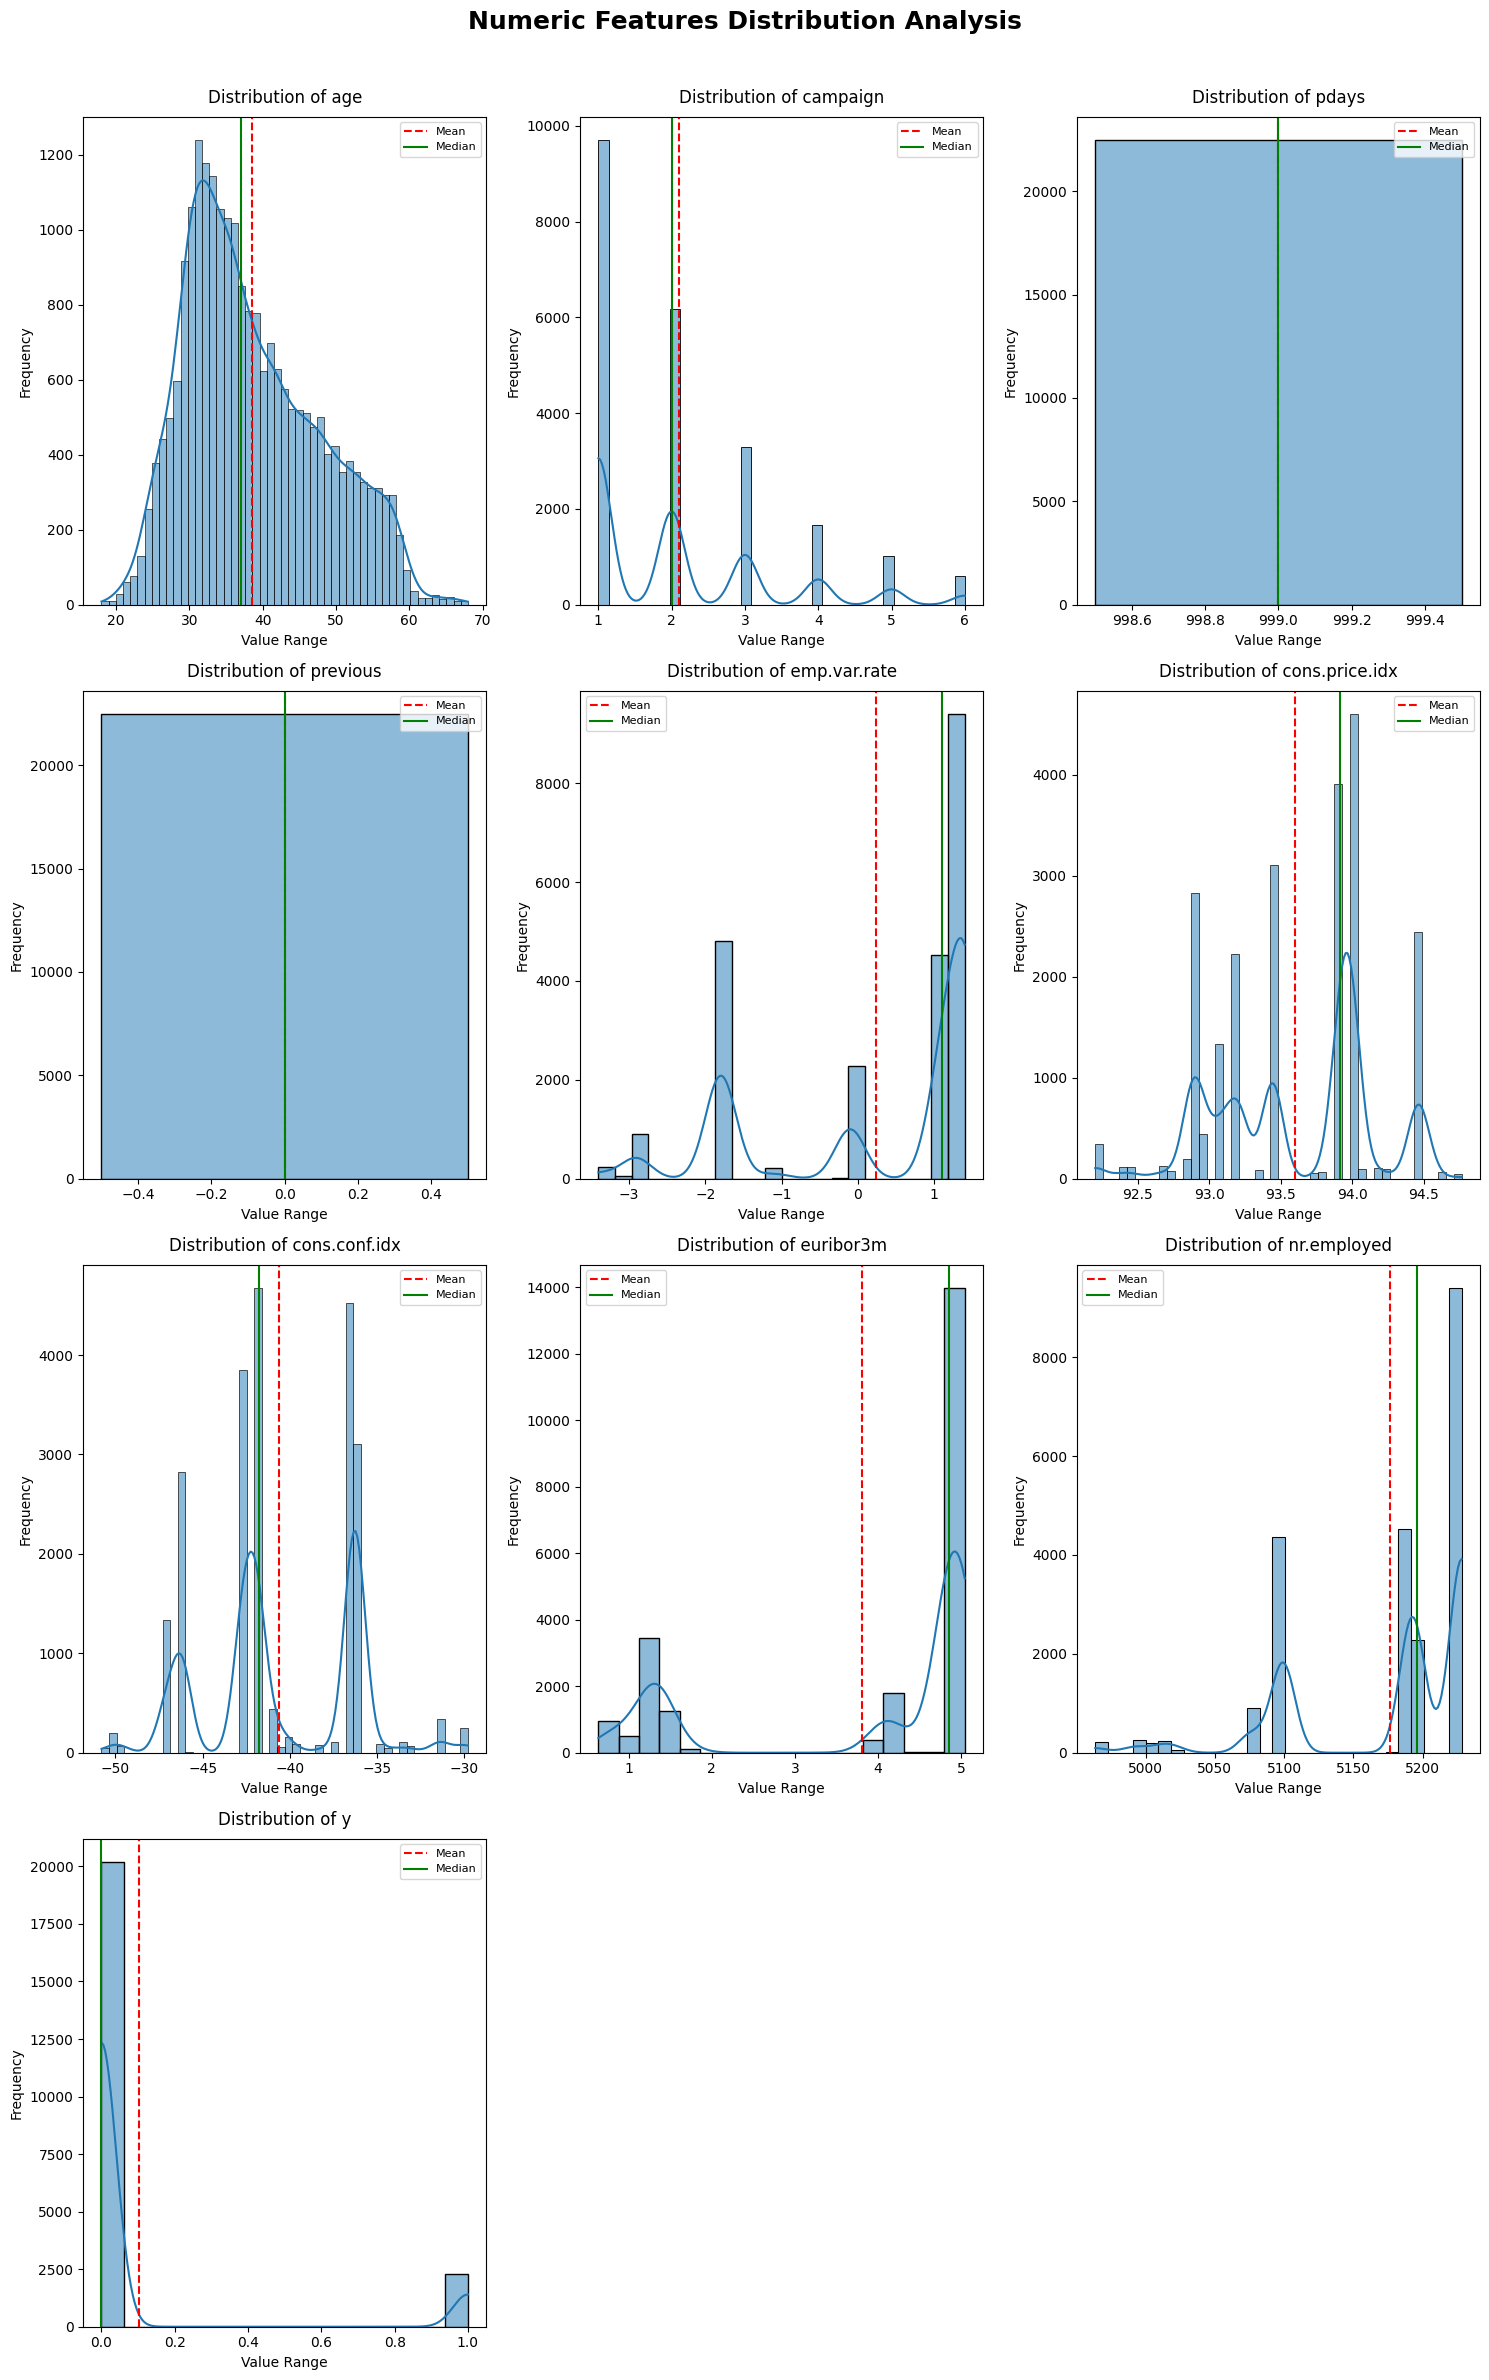

In [19]:
# Plot the histograms for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
plot_grid_histograms(df, numeric_cols)

**Box plots of numerical features after removal of outliers**     
When the '1' median line is lower than the '0' median line, subscription is more likely, for example, for the lower values of the following features:     
**cons.price.idx**,   **euribor3m**,   **nr.employed**,   **age**,    **emp.var.rate**

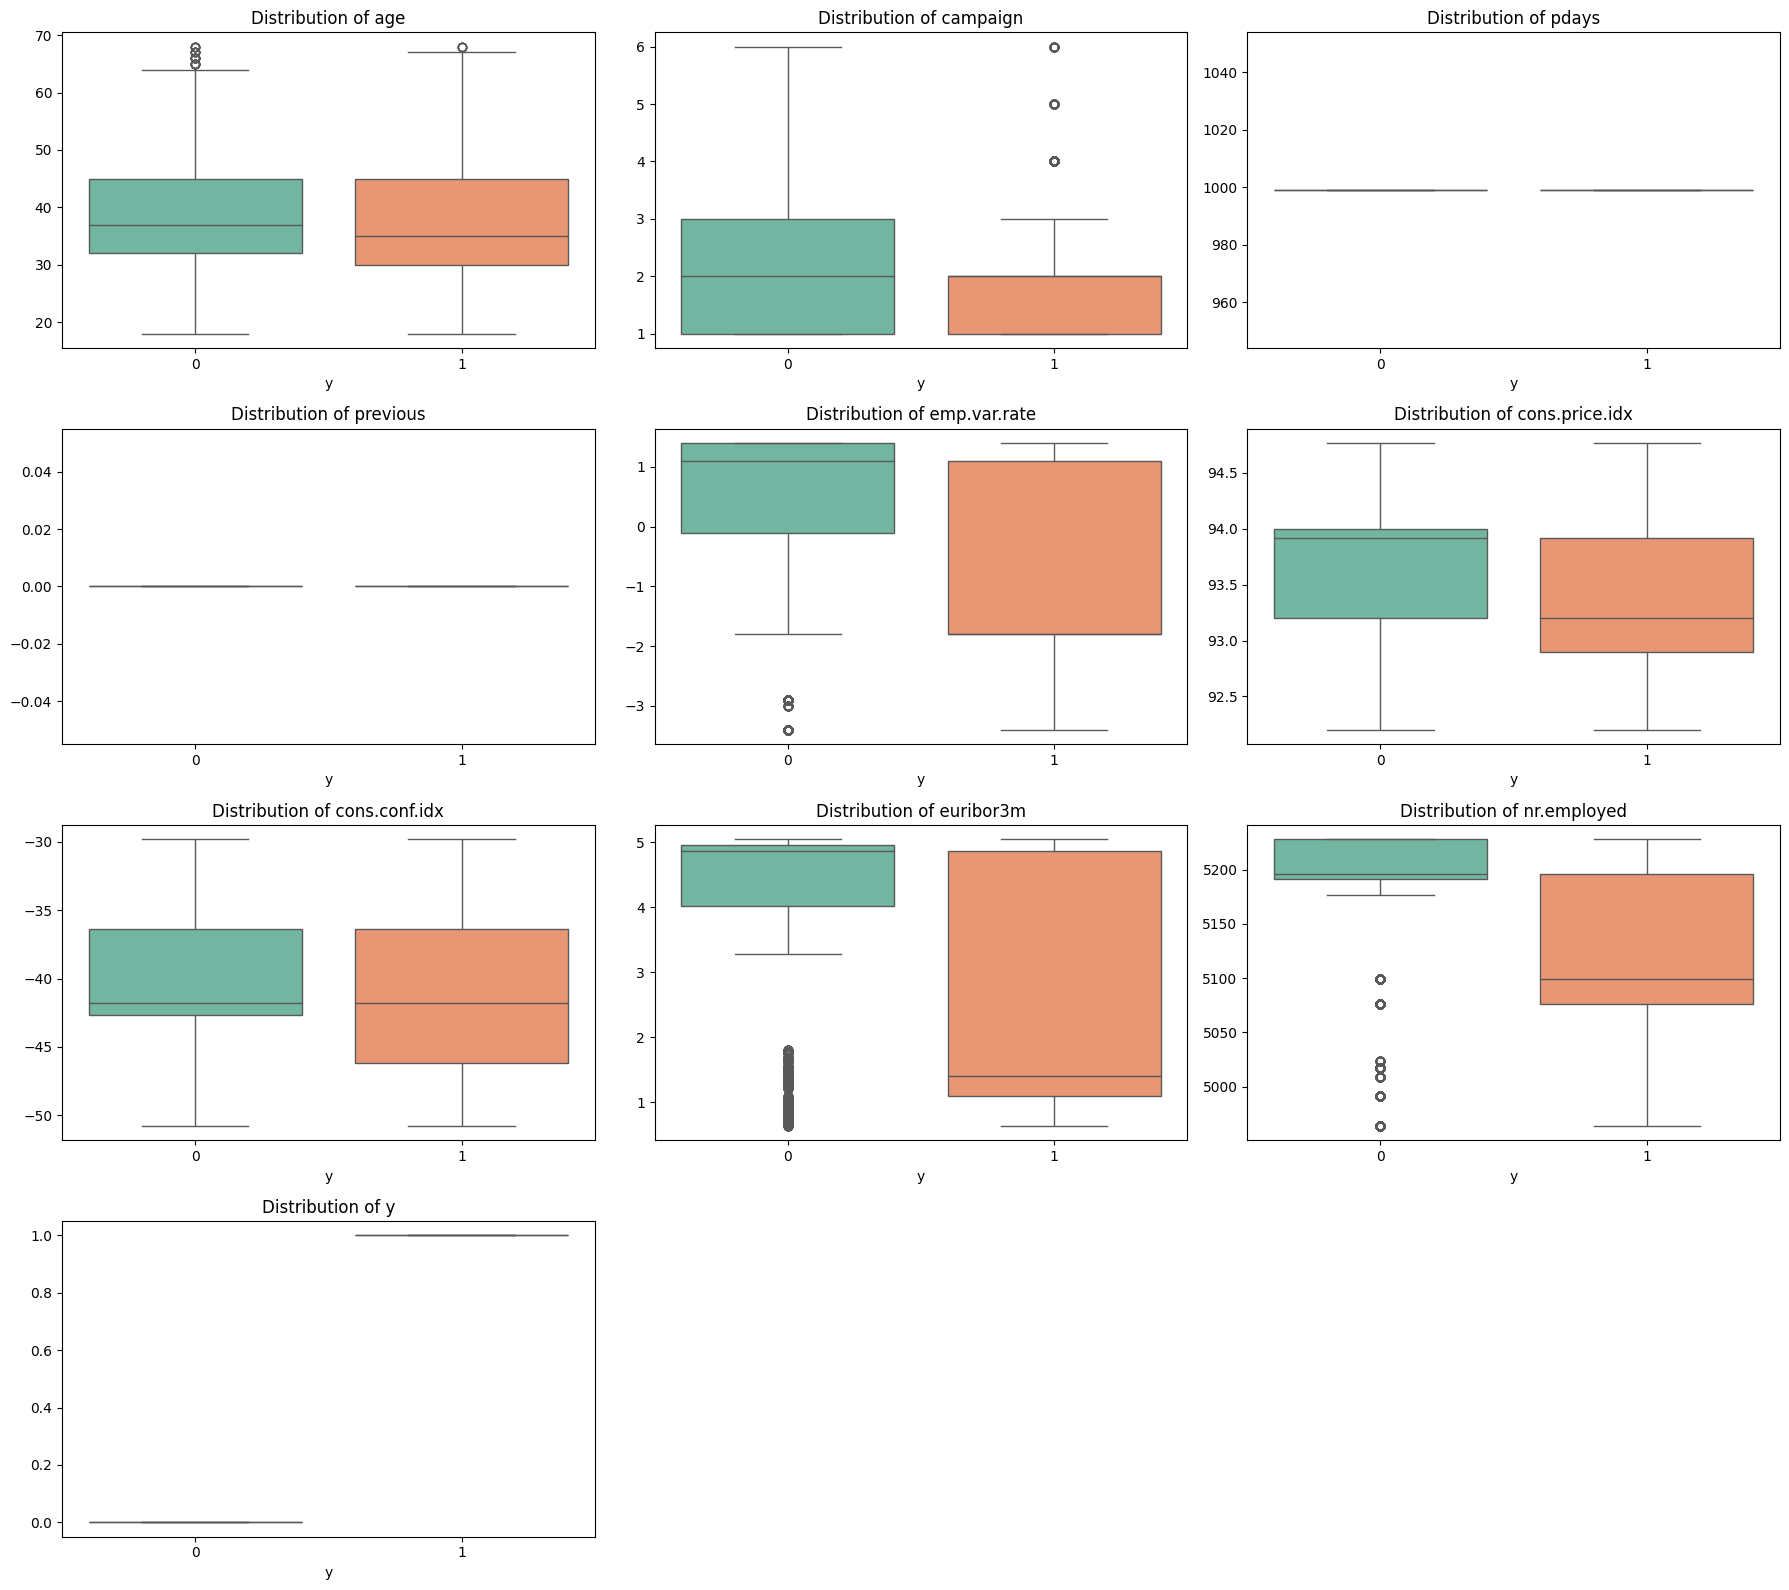

In [20]:
# Box plots of numerical features after removal of outliers
n_features = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_features/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df['y'], y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
# Display features medians of '0' and '1'
medians = df.groupby('y')[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
 'euribor3m','nr.employed']].median().T
medians

y,0,1
age,37.000,35.000
campaign,2.000,2.000
pdays,999.000,999.000
previous,0.000,0.000
emp.var.rate,1.100,-1.800
cons.price.idx,93.918,93.200
cons.conf.idx,-41.800,-41.800
euribor3m,4.858,1.405
nr.employed,5195.800,5099.100


**HEAT MAP highlighting significant correlations**     
Four (4) features are observed to have significant correlations with 'subscription' as follows:     
**emp.var.rate** (-0.26) has a negative correlation with 'subscription'(the more of these features, the less likely to subscribe). The same is true for the following features: **cons.price.idx** (-0.15), **euribor3m** (-0.26), **nr.employed** (-0.28)    

Also, **euribor3m** is strongly correlated with **emp.var.rate** (0.97) as well as **nr.employed** with **emp.var.rate** (0.91).     
In order to reduce redundancy and multicollinearity, **emp.var.rate** is dropped. This preserves underlying information while improving model stability and interpretability.

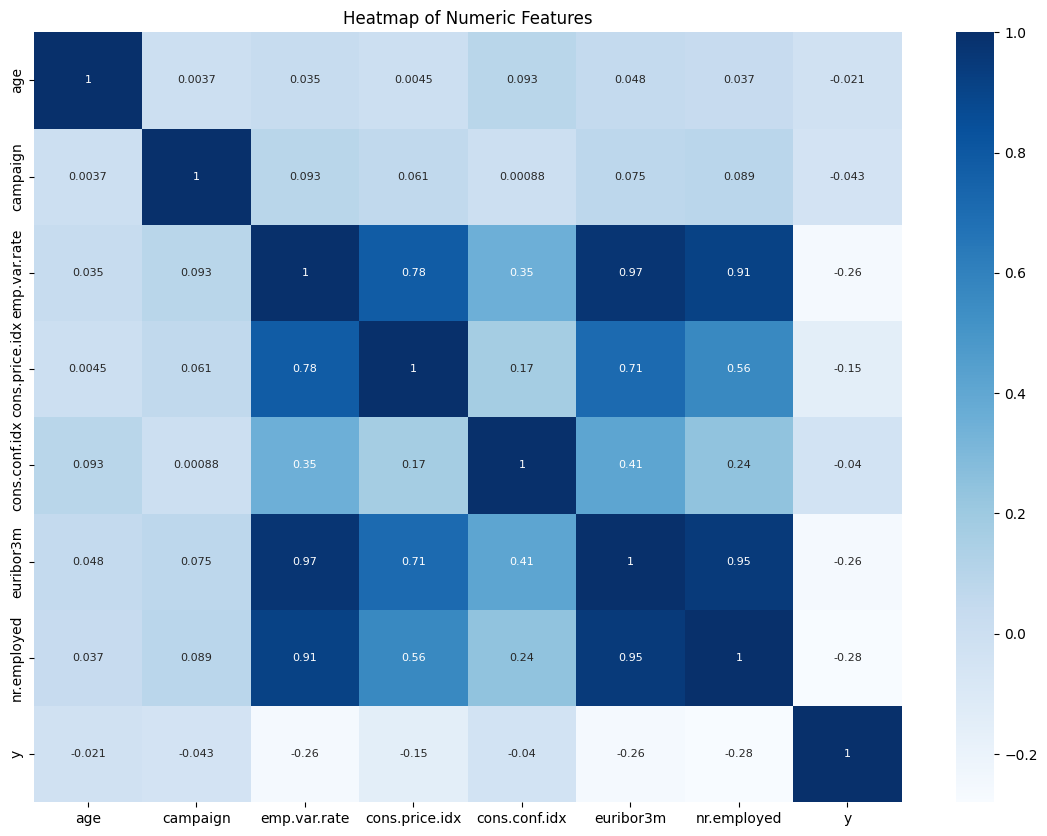

In [22]:
# Display the heat map of selected numeric features
df_numeric_selected = df[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
plt.figure(figsize=(14,10))
ax = sns.heatmap(
    df_numeric_selected.corr(),
    annot=True,
    cmap='Blues',
    annot_kws={"size": 8});
plt.title(f'Heatmap of Numeric Features')
plt.show()

**PAIR PLOT Analysis**     
**cons.price.idx** - **diagonal** - there are more subscriptions at lower values of consumer price index. vs **euribor3m** - there are more subscriptions at lower euribor three month rates across all values of consumer price index. vs **nr.employed** more subscriptions at lower number of employees. vs **age** - subscriptions are fairly distributed.

**euribor3m** - **diagonal** - there are slightly more subscriptions at low euribor three month rate. vs **nr.employed** - subscriptions are fairly distributed. vs **age** - for all ages, there are more subscriptions at low euribor three month rate.

**nr.employed** - **diagonal** - tri-modal and skewed left. vs **age** - there are more subscriptions at lower values of number employed at all ages.    

**age** - **diagonal** - slightly skewed right.

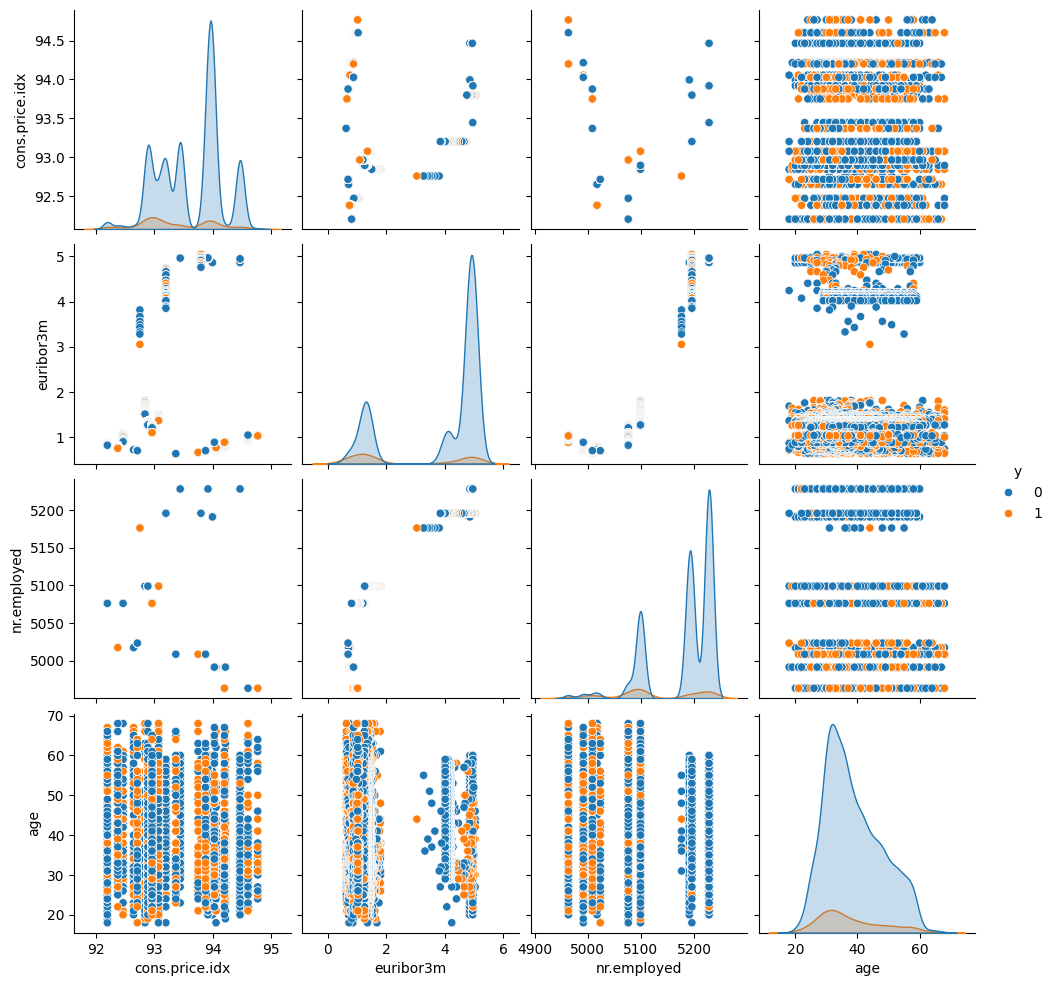

In [23]:
# Pair plot the top 6 numeric features
top_features = ['cons.price.idx','euribor3m','nr.employed','age','y']
sns.pairplot(df[top_features], hue='y', diag_kind="kde")
plt.show()

**Group 'rare' months (those comprising less than 10% of months data) to address the data imbalance in 'month'**

In [24]:
# Verify 'month'
val_count_month = df['month'].value_counts(normalize=True)

print(val_count_month)

month
may    0.329803
jul    0.180787
aug    0.156625
jun    0.132687
nov    0.106879
apr    0.061538
mar    0.012681
sep    0.009923
oct    0.005784
dec    0.003293
Name: proportion, dtype: float64


In [25]:
# Group 'rare' months
rare_months = ['apr','mar','sep','oct','dec']
df['month'] = df['month'].replace(rare_months, 'rare')

In [26]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22474 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22474 non-null  int64  
 1   job             22474 non-null  object 
 2   marital         22474 non-null  object 
 3   education       22474 non-null  object 
 4   default         22474 non-null  object 
 5   housing         22474 non-null  object 
 6   loan            22474 non-null  object 
 7   contact         22474 non-null  object 
 8   month           22474 non-null  object 
 9   day_of_week     22474 non-null  object 
 10  campaign        22474 non-null  int64  
 11  pdays           22474 non-null  int64  
 12  previous        22474 non-null  int64  
 13  poutcome        22474 non-null  object 
 14  emp.var.rate    22474 non-null  float64
 15  cons.price.idx  22474 non-null  float64
 16  cons.conf.idx   22474 non-null  float64
 17  euribor3m       22474 non-null  floa

In [27]:
# Verify 'rare' in 'month'
val_count_month = df['month'].value_counts()

print(val_count_month)

month
may     7412
jul     4063
aug     3520
jun     2982
nov     2402
rare    2095
Name: count, dtype: int64


**Feature engineering - economic index**     
In order to reduce dimensionality, remove multicollinearity, improve the stability of coefficients and keep the economic signal intact, an **economic index** is created for the following columns: **emp.var.rate**, **nr.employed**, and **euribor3m**.

In [28]:
# Create economic index
df['economic_index'] = (df['emp.var.rate'].rank(pct=True) + df['nr.employed'].rank(pct=True)\
                        + df['euribor3m'].rank(pct=True))/3
df = df.drop(columns=['emp.var.rate','nr.employed','euribor3m'])

In [29]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22474 entries, 0 to 41186
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22474 non-null  int64  
 1   job             22474 non-null  object 
 2   marital         22474 non-null  object 
 3   education       22474 non-null  object 
 4   default         22474 non-null  object 
 5   housing         22474 non-null  object 
 6   loan            22474 non-null  object 
 7   contact         22474 non-null  object 
 8   month           22474 non-null  object 
 9   day_of_week     22474 non-null  object 
 10  campaign        22474 non-null  int64  
 11  pdays           22474 non-null  int64  
 12  previous        22474 non-null  int64  
 13  poutcome        22474 non-null  object 
 14  cons.price.idx  22474 non-null  float64
 15  cons.conf.idx   22474 non-null  float64
 16  y               22474 non-null  int64  
 17  economic_index  22474 non-null  floa

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [30]:
# Define X and y
X = df.drop(['y'], axis=1)
y = df['y']

In [31]:
# Verify categorical features for encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [32]:
# Define the ordinal and nominal features
ordinal_features = ['education']
nominal_features = ['job','marital','default','housing','loan','contact','month','day_of_week','poutcome']

In [33]:
# Verify 'education' items
val_count_education = df['education'].value_counts()

print(val_count_education)

education
university.degree      7569
high.school            5670
basic.9y               3290
professional.course    3214
basic.4y               1655
basic.6y               1066
illiterate               10
Name: count, dtype: int64


In [34]:
# Prepare the ordinal encoder
ordinal_encoder = OrdinalEncoder(
    categories=[
      ['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course']
    ]
)

In [35]:
# Prepare the transformer for encoding categorical data and scaling the rest
transformer = make_column_transformer(
    (ordinal_encoder, ordinal_features),
    (OneHotEncoder(drop='first'), nominal_features),
    remainder=StandardScaler()
)
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'university.degree',
                                                             'professional.course']]),
                                 ['education']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week',
                                  'poutcome'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [36]:
# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [37]:
# Build a baseline model
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [38]:
# Evaluate baseline model using 'roc_auc'
y_proba = baseline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print(f'The baseline Receiver Operating Curve AUC is {roc_auc:.2f}')

The baseline Receiver Operating Curve AUC is 0.50


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

**Build a simple Logistic Regression model**

---



In [39]:
# Build a simple Logistic Regression model
lgr_pipe1 = Pipeline([
    ('transformer', transformer),
    ('lgr', LogisticRegression(random_state=42))
])
start = time.perf_counter()
lgr_pipe1.fit(X_train, y_train)
end = time.perf_counter()
train_time_lgr1 = end - start

print(f'Train time for "lgr_pipe1" is {train_time_lgr1:.2f} sec. \n')
lgr_pipe1

Train time for "lgr_pipe1" is 0.31 sec. 



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('lgr', LogisticRegression(random_state=42))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [40]:
# Accuracy of lgr_pipe1 on train and test data
lgr_pipe1_acc_train = lgr_pipe1.score(X_train, y_train)
lgr_pipe1_acc_test = lgr_pipe1.score(X_test, y_test)

print(f'The train accuracy of the model is {lgr_pipe1_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {lgr_pipe1_acc_test*100:.2f}%')

The train accuracy of the model is 90.10%
The test accuracy of the model is 90.01%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

**Build a simple Decision Tree Classifier model**

In [41]:
# Prepare the transformer for encoding categorical data without scaling the rest
transformer = make_column_transformer(
    (ordinal_encoder, ordinal_features),
    (OneHotEncoder(drop='first'), nominal_features),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'university.degree',
                                                             'professional.course']]),
                                 ['education']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week',
                                  'poutcome'])])

In [42]:
# Build a simple Decision Tree Classifier model
dtree_pipe1 = Pipeline([
    ('transformer', transformer),
    ('dtree', DecisionTreeClassifier(random_state=42))
])
start = time.perf_counter()
dtree_pipe1.fit(X_train, y_train)
end = time.perf_counter()
train_time_dtree1 = end - start

print(f'Train time for "dtree_pipe1" is {train_time_dtree1:.2f} sec. \n')
dtree_pipe1

Train time for "dtree_pipe1" is 0.18 sec. 



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('dtree', DecisionTreeClassifier(random_state=42))])

In [43]:
# Accuracy of dtree_pipe1 on train and test data
dtree_pipe1_acc_train = dtree_pipe1.score(X_train, y_train)
dtree_pipe1_acc_test = dtree_pipe1.score(X_test, y_test)

print(f'The train accuracy of the model is {dtree_pipe1_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {dtree_pipe1_acc_test*100:.2f}%')

The train accuracy of the model is 99.39%
The test accuracy of the model is 82.20%


**Build a simple K-Nearest Neighbors Classifier model**

In [44]:
# Prepare the transformer for encoding categorical data and scaling the rest
transformer = make_column_transformer(
    (ordinal_encoder, ordinal_features),
    (OneHotEncoder(), nominal_features),
    remainder=StandardScaler()
)
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'university.degree',
                                                             'professional.course']]),
                                 ['education']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week',
                                  'poutcome'])])

In [45]:
# Build a simple K-Nearest Neighbors Classifier model
knn_pipe1 = Pipeline([
    ('transformer', transformer),
    ('knn', KNeighborsClassifier())
])
start = time.perf_counter()
knn_pipe1.fit(X_train, y_train)
end = time.perf_counter()
train_time_knn1 = end - start

print(f'Train time for "knn_pipe1" is {train_time_knn1:.2f} sec. \n')
knn_pipe1

Train time for "knn_pipe1" is 0.06 sec. 



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('knn', KNeighborsClassifier())])

In [46]:
# Accuracy of knn_pipe1 on train and test data
knn_pipe1_acc_train = knn_pipe1.score(X_train, y_train)
knn_pipe1_acc_test = knn_pipe1.score(X_test, y_test)

print(f'The train accuracy of the model is {knn_pipe1_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {knn_pipe1_acc_test*100:.2f}%')

The train accuracy of the model is 91.28%
The test accuracy of the model is 88.34%


**Build a simple Support Vector Classifier (SVC) model**

**Load the smaller dataset for SVC**     
A representative smaller dataset is used for SVC in order to conserve computational resources.

In [47]:
df1 = pd.read_csv('bank-additional.csv', sep = ';')

In [48]:
# Verify the dataset
df1.head().T

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [49]:
# Convert the target variable 'y' to explicitly define the positive class and simplify metric interpretation
df1['y'] = df1['y'].map({'yes': 1, 'no': 0})

In [50]:
# Drop the column 'duration' as explained above
df1 = df1.drop(columns=['duration'])

In [51]:
# Check the info and note the number of rows and columns, data types and any missing rows
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [52]:
# Verify the total missing values
total_missing_values = df1.isnull().sum().sum()  # count the total number of missing values
print(f'There are {total_missing_values} total missing values.')

There are 0 total missing values.


In [53]:
# Examine the descriptive statistical analysis
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100
y,4119.0,0.109493,0.312294,0.000,0.000,0.000,0.000,1.000


In [54]:
# Verify duplicates
duplicates = len(df1[df1.duplicated()])

print(f'There are {duplicates} duplicate rows.')

There are 19 duplicate rows.


In [55]:
# Remove duplicate rows
df1 = df1.drop_duplicates()
duplicates = len(df1[df1.duplicated()])

print(f'There are {duplicates} duplicate rows.')

There are 0 duplicate rows.


In [56]:
# Check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4100 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4100 non-null   int64  
 1   job             4100 non-null   object 
 2   marital         4100 non-null   object 
 3   education       4100 non-null   object 
 4   default         4100 non-null   object 
 5   housing         4100 non-null   object 
 6   loan            4100 non-null   object 
 7   contact         4100 non-null   object 
 8   month           4100 non-null   object 
 9   day_of_week     4100 non-null   object 
 10  campaign        4100 non-null   int64  
 11  pdays           4100 non-null   int64  
 12  previous        4100 non-null   int64  
 13  poutcome        4100 non-null   object 
 14  emp.var.rate    4100 non-null   float64
 15  cons.price.idx  4100 non-null   float64
 16  cons.conf.idx   4100 non-null   float64
 17  euribor3m       4100 non-null   float6

In [57]:
# List the numeric columns
numeric_cols = df1.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [58]:
# Verify the distributions for categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
for i in categorical_cols:
    value_count_column = df1[i].value_counts(normalize=True)
    print(f'The value count for column {value_count_column} \n')

The value count for column job
admin.           0.244878
blue-collar      0.215610
technician       0.167805
services         0.094878
management       0.079024
retired          0.040244
self-employed    0.038780
entrepreneur     0.036098
unemployed       0.027073
housemaid        0.026341
student          0.019756
unknown          0.009512
Name: proportion, dtype: float64 

The value count for column marital
married     0.609268
single      0.279512
divorced    0.108537
unknown     0.002683
Name: proportion, dtype: float64 

The value count for column education
university.degree      0.307073
high.school            0.222683
basic.9y               0.139512
professional.course    0.130244
basic.4y               0.104146
basic.6y               0.055366
unknown                0.040732
illiterate             0.000244
Name: proportion, dtype: float64 

The value count for column default
no         0.803902
unknown    0.195854
yes        0.000244
Name: proportion, dtype: float64 

The value 

In [59]:
# drop 'unknown' from respective columns
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in columns:
    df1 = df1[df1[col] != 'unknown']

In [60]:
# Verify 'month'
val_count_month = df1['month'].value_counts(normalize=True)

print(val_count_month)

month
may    0.317057
jul    0.166341
aug    0.159505
nov    0.125651
jun    0.118490
apr    0.055013
oct    0.019857
sep    0.018555
mar    0.013346
dec    0.006185
Name: proportion, dtype: float64


**Group 'rare' months to address the data imbalance in 'month'**

In [61]:
# Group 'rare' months
rare_months = ['apr','mar','sep','oct','dec']
df1['month'] = df1['month'].replace(rare_months, 'rare')
val_count_month = df1['month'].value_counts()

print(val_count_month)

month
may     974
jul     511
aug     490
nov     386
jun     364
rare    347
Name: count, dtype: int64


In [62]:
# Check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3072 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3072 non-null   int64  
 1   job             3072 non-null   object 
 2   marital         3072 non-null   object 
 3   education       3072 non-null   object 
 4   default         3072 non-null   object 
 5   housing         3072 non-null   object 
 6   loan            3072 non-null   object 
 7   contact         3072 non-null   object 
 8   month           3072 non-null   object 
 9   day_of_week     3072 non-null   object 
 10  campaign        3072 non-null   int64  
 11  pdays           3072 non-null   int64  
 12  previous        3072 non-null   int64  
 13  poutcome        3072 non-null   object 
 14  emp.var.rate    3072 non-null   float64
 15  cons.price.idx  3072 non-null   float64
 16  cons.conf.idx   3072 non-null   float64
 17  euribor3m       3072 non-null   float6

In [63]:
# List the numeric columns
numeric_cols = df1.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [64]:
# Removal of outliers from numeric features using IQR
outliers_numeric_list = ['age','campaign','pdays','previous','cons.price.idx','cons.conf.idx',
                          'euribor3m','nr.employed']
for col in outliers_numeric_list:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

In [65]:
# Create economic index
df1['economic_index'] = (df1['emp.var.rate'].rank(pct=True) + df1['nr.employed'].rank(pct=True)\
                        + df1['euribor3m'].rank(pct=True))/3
df1 = df1.drop(columns=['emp.var.rate','nr.employed','euribor3m'])

In [66]:
# Check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2384 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2384 non-null   int64  
 1   job             2384 non-null   object 
 2   marital         2384 non-null   object 
 3   education       2384 non-null   object 
 4   default         2384 non-null   object 
 5   housing         2384 non-null   object 
 6   loan            2384 non-null   object 
 7   contact         2384 non-null   object 
 8   month           2384 non-null   object 
 9   day_of_week     2384 non-null   object 
 10  campaign        2384 non-null   int64  
 11  pdays           2384 non-null   int64  
 12  previous        2384 non-null   int64  
 13  poutcome        2384 non-null   object 
 14  cons.price.idx  2384 non-null   float64
 15  cons.conf.idx   2384 non-null   float64
 16  y               2384 non-null   int64  
 17  economic_index  2384 non-null   float6

In [67]:
# Define X and y
X1 = df1.drop(['y'], axis=1)
y1 = df1['y']

In [68]:
# Verify categorical features for encoding
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [69]:
# Define the ordinal and nominal features
ordinal_features = ['education']
nominal_features = ['job','marital','default','housing','loan','contact','month','day_of_week','poutcome']

In [70]:
# Verify 'education' items
val_count_education = df['education'].value_counts()

print(val_count_education)

education
university.degree      7569
high.school            5670
basic.9y               3290
professional.course    3214
basic.4y               1655
basic.6y               1066
illiterate               10
Name: count, dtype: int64


In [71]:
# Prepare the ordinal encoder
ordinal_encoder = OrdinalEncoder(
    categories=[
      ['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course']
    ]
)

In [72]:
# Prepare the transformer for encoding categorical data and scaling the rest
transformer = make_column_transformer(
    (ordinal_encoder, ordinal_features),
    (OneHotEncoder(drop='first'), nominal_features),
    remainder=StandardScaler()
)
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'university.degree',
                                                             'professional.course']]),
                                 ['education']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week',
                                  'poutcome'])])

In [73]:
# Split to train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42, stratify=y1)

In [74]:
# Build a simple Decision Tree Classifier model
svc_pipe1 = Pipeline([
    ('transformer', transformer),
    ('svc', SVC(random_state=42))
])
start = time.perf_counter()
svc_pipe1.fit(X1_train, y1_train)
end = time.perf_counter()
train_time_svc1 = end - start

print(f'Train time for "svc_pipe1" is {train_time_svc1:.2f} sec. \n')
svc_pipe1

Train time for "svc_pipe1" is 0.09 sec. 



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('svc', SVC(random_state=42))])

In [75]:
# Accuracy of svc_pipe1 on train and test data
svc_pipe1_acc_train = svc_pipe1.score(X1_train, y1_train)
svc_pipe1_acc_test = svc_pipe1.score(X1_test, y1_test)

print(f'The train accuracy of the model is {svc_pipe1_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {svc_pipe1_acc_test*100:.2f}%')

The train accuracy of the model is 91.14%
The test accuracy of the model is 91.19%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

**Build the dataframe to present the findings**

In [76]:
# Build the dataframe
simple_models_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Classifier'],
    'Train Time': [train_time_lgr1, train_time_dtree1, train_time_knn1, train_time_svc1],
    'Train Accuracy': [lgr_pipe1_acc_train, dtree_pipe1_acc_train, knn_pipe1_acc_train, svc_pipe1_acc_train],
    'Test Accuracy': [lgr_pipe1_acc_test, dtree_pipe1_acc_test, knn_pipe1_acc_test, svc_pipe1_acc_test]
})
simple_models_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.311156,0.900996,0.900111
1,Decision Tree,0.182753,0.993882,0.822024
2,K-Nearest Neighbors,0.060817,0.912843,0.883426
3,Support Vector Classifier,0.093733,0.911379,0.911950


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Find the optimal mix of precision and recall**     
In achieving the objective of predicting the clients who will subscribe to a bank term deposit so that they can be pursued by the marketing department, the best classifier that can identify most of these clients is determined.    
Since the potential gains are valued more than the cost of subscription, recall will be maximized at the expense of precision and accuracy. A suitable mix of precision and recall that is aligned with the business strategy will be proposed.      
Given the lifetime value and the cost of subscription, precision and recall combinations are iterated to determine the threshold that maximizes profit.

**Improve the Logistic Regression model**     
Use the parameter class_weight='balanced' to address the imbalanced dataset.

In [77]:
# Use the parameter class_weight='balanced' to address the imbalanced dataset
lgr_pipe2 = Pipeline([
    ('transformer', transformer),
    ('lgr', LogisticRegression(class_weight='balanced', random_state=42))
])
lgr_pipe2.fit(X_train, y_train)
lgr_pipe2

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('lgr',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [78]:
# Define parameter grid for HalvingRandomSearchCV
param_grid_lgr = {
    'lgr__C': np.logspace(-4, 4, 20),
    'lgr__penalty': ['l1', 'l2'],
    'lgr__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'lgr__max_iter': [100, 1000, 2500, 5000]
}

**Optimize the Logistic Regression model**

In [79]:
# Run HalvingRandomSearchCV
grid_lgr = HalvingRandomSearchCV(lgr_pipe2, param_grid_lgr, cv=5, scoring='f1', n_jobs=-1)
grid_lgr.fit(X_train, y_train)

print(f'Best parameters: {grid_lgr.best_params_}')

Best parameters: {'lgr__solver': 'saga', 'lgr__penalty': 'l1', 'lgr__max_iter': 100, 'lgr__C': np.float64(0.23357214690901212)}


In [80]:
# Access the optimized lgr_pipe2 pipeline model
lgr_pipe2_opt = grid_lgr.best_estimator_
lgr_pipe2_opt

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('lgr',
                 LogisticRegression(C=np.float64(0.23357214690901212),
                                    class_weight='balanced', penalty='l1',
                                    random_state=42, solver='saga'))])

In [81]:
# Accuracy of lgr_pipe2_opt on train and test data
lgr_pipe2_opt_acc_train = lgr_pipe2_opt.score(X_train, y_train)
lgr_pipe2_opt_acc_test = lgr_pipe2_opt.score(X_test, y_test)

print(f'The train accuracy of the model is {lgr_pipe2_opt_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {lgr_pipe2_opt_acc_test*100:.2f}%')

The train accuracy of the model is 80.40%
The test accuracy of the model is 78.95%


In [82]:
# Generate classification report L2
y_pred_L2 = lgr_pipe2_opt.predict(X_test)

print(classification_report(y_test, y_pred_L2))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      4037
           1       0.25      0.55      0.35       458

    accuracy                           0.79      4495
   macro avg       0.60      0.68      0.61      4495
weighted avg       0.87      0.79      0.82      4495



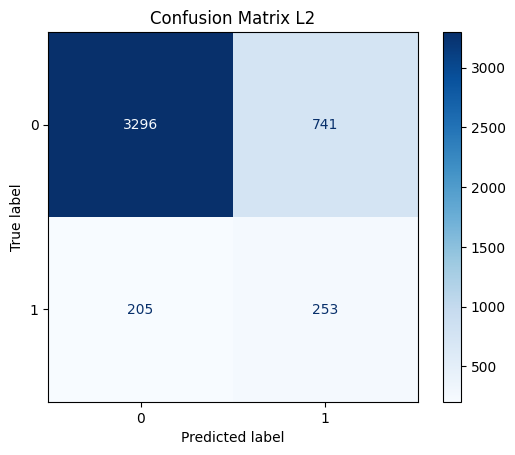

In [83]:
# Display confusion matrix L2
conf_matrix_L2 = confusion_matrix(y_test, y_pred_L2)
disp_L2 = ConfusionMatrixDisplay(conf_matrix_L2, display_labels=['0','1'])
disp_L2.plot(cmap='Blues')
plt.title('Confusion Matrix L2')
plt.show()

In [84]:
# Values for false positive (fp_L2), false negative (fn_L2), true positive (tp_L2) and true negative (tn_L2)
fp_L2 = conf_matrix_L2[0][1]
fn_L2 = conf_matrix_L2[1][0]
tp_L2 = conf_matrix_L2[1][1]
tn_L2 = conf_matrix_L2[0][0]

print(f' fp_L2: {fp_L2} \n fn_L2: {fn_L2} \n tp_L2: {tp_L2} \n tn_L2: {tn_L2}')

 fp_L2: 741 
 fn_L2: 205 
 tp_L2: 253 
 tn_L2: 3296


In [85]:
# Calculations for accuracy, precision, recall
accuracy_L2 = (tp_L2 + tn_L2)/len(y_test)
precision_L2 = tp_L2/(tp_L2 + fp_L2)
recall_L2 = tp_L2/(tp_L2 + fn_L2)

print(f'Accuracy: {accuracy_L2:.2f}')
print(f'Precision: {precision_L2:.2f}')
print(f'Recall: {recall_L2:.2f}')
print(f'-'*28)

Accuracy: 0.79
Precision: 0.25
Recall: 0.55
----------------------------


**$F$-score**   
The formula for the $F$-score is $F_{\beta} = (1 + \beta^2) \frac{PR}{\beta^2 P + R}$, where $P$ is precision and $R$ is recall.    
It is a common metric used to find the best balance between catching as many positive cases as possible (Recall) and being accurate when you do (Precision).    

With β=2, it is considered that Recall is twice as important as Precision and is used where recall is optimized.

In [86]:
# Calculate F2 score
beta = 2
F2_score_L2 = (1 + beta**2) * (precision_L2 * recall_L2) / (beta**2 * precision_L2 + recall_L2)

print(f'The F2 score is {F2_score_L2:.4f}')

The F2 score is 0.4476


**Profit/loss**     
In order to calculate the profit or loss, a value of \$500 is assumed to be gained for every client that is subscribed while a cost of \$20 is spent for every client that is pursued. A true positive is a client that is predicted to subscribe and is therefore pursued and actually subscribed. A false positive is a client that is predicted to subscribe and is therefore pursued but is actually not subscribing. A false negative is a client predicted not to subscribe and is therefore not pursued but is actually subscribing. In this case, the client's business is lost because the client was not pursued.

In [87]:
# Profit/loss analysis
L = 500
C = 60
Profit_Loss_L2 = tp_L2*(L - C) - fp_L2*C - fn_L2*L

print(f'The profit or loss is ${Profit_Loss_L2}')

The profit or loss is $-35640


**Plot the ROC curve and obtain the AUC**     
The ROC Curve plots the True Positive Rate vs False Positive Rate for every possible threshold.
The higher the AUC (Area Under the Curve) and the more the curve 'bows' toward the top left corner, the better the model is.

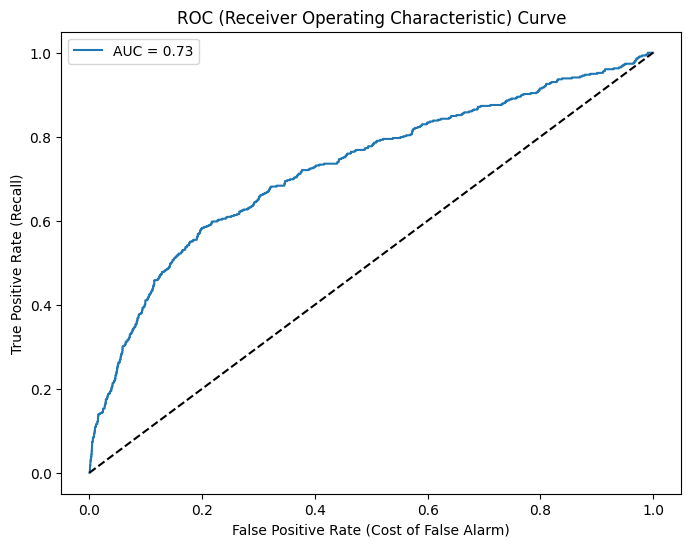

In [88]:
# Plot the ROC Curve
y_probs_L2 = lgr_pipe2_opt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_L2)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs_L2):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

**Optimal Threshold**    
The optimal threshold is a careful balance between precision and recall. What threshold to use is a business decision. High precision means money is not wasted on pursuing clients who are not actually going to subscribe. High recall means that customers who are subscribing are not missed. However, raising recall lowers precision. Lowering the threshold increases recall but decreases precision.     
_Youden's J Statistic_     
This method to find the optimal threshold from the ROC curve maximizes the vertical distance from the diagonal line or line of random guessing. However, this assumes that the cost of false positive (wrongly flagging a client might be a subscriber) is the same as a false negative (missing a client who is subscribing). For example, if missing a subscriber costs a lot more than wrongly flagging a client as a subscriber, the threshold should be lowered (move higher on the ROC curve) and move away from the 'Youden point' or optimal threshold.

In [89]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_L2 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold_L2 :.4f}')

The optimal threshold is 0.4880


**Precision-Recall Curve**   
The Precision-Recall Curve shows how precision suffers with the increase in recall.

In [90]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_L2)
avg_precision = average_precision_score(y_test, y_probs_L2)

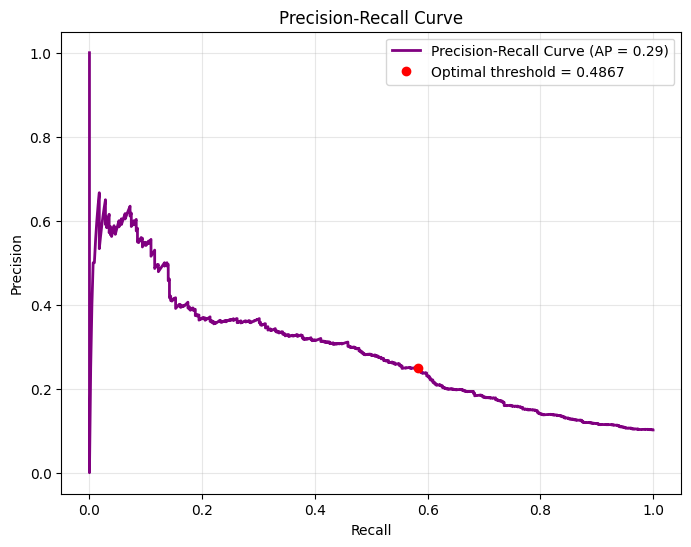

In [91]:
# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold_L2))
plt.plot(recall[idx], precision[idx], 'ro', label='Optimal threshold = 0.4867')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

**Evaluate precision and recall at different thresholds**     
As shown in the table below, recall improves to 99% when threshold is lowered to 0.20.

In [92]:
# Evaluate precision and recall at different thresholds
thresholds = np.arange(0.05, 0.70, 0.05)
for threshold in thresholds:
    preds = (y_probs_L2 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y_test, preds):.2f} | Recall={recall_score(y_test, preds):.2f}')

Threshold=0.05 | Precision=0.10 | Recall=1.00
Threshold=0.10 | Precision=0.10 | Recall=1.00
Threshold=0.15 | Precision=0.10 | Recall=1.00
Threshold=0.20 | Precision=0.10 | Recall=0.99
Threshold=0.25 | Precision=0.11 | Recall=0.95
Threshold=0.30 | Precision=0.12 | Recall=0.86
Threshold=0.35 | Precision=0.15 | Recall=0.79
Threshold=0.40 | Precision=0.17 | Recall=0.72
Threshold=0.45 | Precision=0.21 | Recall=0.62
Threshold=0.50 | Precision=0.25 | Recall=0.55
Threshold=0.55 | Precision=0.28 | Recall=0.49
Threshold=0.60 | Precision=0.30 | Recall=0.47
Threshold=0.65 | Precision=0.30 | Recall=0.46


**Threshold that maximizes profit**   
The threshold that maximizes profit is determined, given the lifetime value (L) and the cost of subscription (C).

In [93]:
# Determine the threshold that maximizes profit
profits = []
L = 500
C = 60
for t in thresholds:
    y_pred = (y_probs_L2 >= t).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.4


**Use the threshold that maximizes profit**

In [94]:
# Use the threshold that maximizes profit
y_pred_L3 = (y_probs_L2 >= best_threshold).astype(int)

In [95]:
# Generate classification report L3

print(classification_report(y_test, y_pred_L3))

              precision    recall  f1-score   support

           0       0.95      0.61      0.75      4037
           1       0.17      0.72      0.28       458

    accuracy                           0.63      4495
   macro avg       0.56      0.67      0.51      4495
weighted avg       0.87      0.63      0.70      4495



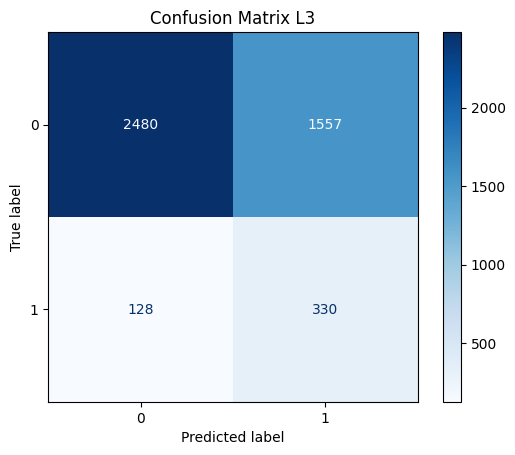

In [96]:
# Display confusion matrix L3
conf_matrix_L3 = confusion_matrix(y_test, y_pred_L3)
disp_L3 = ConfusionMatrixDisplay(conf_matrix_L3, display_labels=['0','1'])
disp_L3.plot(cmap='Blues')
plt.title('Confusion Matrix L3')
plt.show()

In [97]:
# Values for false positive (fp_L3), false negative (fn_L3), true positive (tp_L3) and true negative (tn_L3)
fp_L3 = conf_matrix_L3[0][1]
fn_L3 = conf_matrix_L3[1][0]
tp_L3 = conf_matrix_L3[1][1]
tn_L3 = conf_matrix_L3[0][0]

print(f' fp_L3: {fp_L3} \n fn_L3: {fn_L3} \n tp_L3: {tp_L3} \n tn_L3: {tn_L3}')

 fp_L3: 1557 
 fn_L3: 128 
 tp_L3: 330 
 tn_L3: 2480


In [98]:
# Calculations for accuracy, precision, recall
accuracy_L3 = (tp_L3 + tn_L3)/len(y_test)
precision_L3 = tp_L3/(tp_L3 + fp_L3)
recall_L3 = tp_L3/(tp_L3 + fn_L3)

print(f'Accuracy: {accuracy_L3:.2f}')
print(f'Precision: {precision_L3:.2f}')
print(f'Recall: {recall_L3:.2f}')
print(f'-'*28)

Accuracy: 0.63
Precision: 0.17
Recall: 0.72
----------------------------


In [99]:
# Calculate F2 score
beta = 2
F2_score_L3 = (1 + beta**2) * (precision_L3 * recall_L3) / (beta**2 * precision_L3 + recall_L3)

print(f'The F2 score is {F2_score_L3:.4f}')

The F2 score is 0.4437


In [100]:
# Profit/loss analysis
Profit_Loss_L3 = tp_L3*(L - C) - fp_L3*C - fn_L3*L

print(f'The profit or loss is ${Profit_Loss_L3}')

The profit or loss is $-12220


**Feature importance**     
Feature importance is verified by extracting feature names including their coefficients and building them into a dataframe to highlight the features affecting subscription the most.

In [101]:
# Extract feature names
feature_names = lgr_pipe2.named_steps['transformer'].get_feature_names_out()

print(f'The feature names are: \n \n {feature_names} \n')
print(f'There are {len(feature_names)} feature names.')

The feature names are: 
 
 ['ordinalencoder__education' 'onehotencoder__job_blue-collar'
 'onehotencoder__job_entrepreneur' 'onehotencoder__job_housemaid'
 'onehotencoder__job_management' 'onehotencoder__job_retired'
 'onehotencoder__job_self-employed' 'onehotencoder__job_services'
 'onehotencoder__job_student' 'onehotencoder__job_technician'
 'onehotencoder__job_unemployed' 'onehotencoder__marital_married'
 'onehotencoder__marital_single' 'onehotencoder__default_yes'
 'onehotencoder__housing_yes' 'onehotencoder__loan_yes'
 'onehotencoder__contact_telephone' 'onehotencoder__month_jul'
 'onehotencoder__month_jun' 'onehotencoder__month_may'
 'onehotencoder__month_nov' 'onehotencoder__month_rare'
 'onehotencoder__day_of_week_mon' 'onehotencoder__day_of_week_thu'
 'onehotencoder__day_of_week_tue' 'onehotencoder__day_of_week_wed'
 'remainder__age' 'remainder__campaign' 'remainder__pdays'
 'remainder__previous' 'remainder__cons.price.idx'
 'remainder__cons.conf.idx' 'remainder__economic_inde

In [102]:
# Clean up the feature names
clean_names = [i.split('__')[-1] for i in feature_names]

print(f'The clean feature names are: \n \n {clean_names}')

The clean feature names are: 
 
 ['education', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_jul', 'month_jun', 'month_may', 'month_nov', 'month_rare', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'economic_index']


In [103]:
# Extract coefficients
coefficients = lgr_pipe2.named_steps['lgr'].coef_[0]

print(f'The coefficients are: \n')
print(f'{coefficients} \n')
print(f'There are {len(coefficients)} coefficients.')

The coefficients are: 

[ 0.03110067 -0.16079383 -0.05743612  0.08516133  0.02518123  0.15937029
 -0.14074363 -0.2170082   0.36056215 -0.10487956 -0.19792425 -0.04311032
 -0.01039958 -0.01644595 -0.07082168  0.0127908  -0.78404154  0.14681169
  0.11224395 -1.02347046 -0.90682343  0.32836839 -0.09580845  0.075006
  0.08100429  0.2669317  -0.04900903 -0.05688392  0.          0.
  0.21631776  0.12488294 -0.90302101] 

There are 33 coefficients.


In [104]:
# Construct a dataframe of coefficients
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': coefficients})
coef_df = coef_df.sort_values(by='coefs', ascending=False)

print(coef_df.head(35))

              feature     coefs
8         job_student  0.360562
21         month_rare  0.328368
25    day_of_week_wed  0.266932
30     cons.price.idx  0.216318
5         job_retired  0.159370
17          month_jul  0.146812
31      cons.conf.idx  0.124883
18          month_jun  0.112244
3       job_housemaid  0.085161
24    day_of_week_tue  0.081004
23    day_of_week_thu  0.075006
0           education  0.031101
4      job_management  0.025181
15           loan_yes  0.012791
29           previous  0.000000
28              pdays  0.000000
12     marital_single -0.010400
13        default_yes -0.016446
11    marital_married -0.043110
26                age -0.049009
27           campaign -0.056884
2    job_entrepreneur -0.057436
14        housing_yes -0.070822
22    day_of_week_mon -0.095808
9      job_technician -0.104880
6   job_self-employed -0.140744
1     job_blue-collar -0.160794
10     job_unemployed -0.197924
7        job_services -0.217008
16  contact_telephone -0.784042
32     e

**Subscription Odds from the Logistic Regression model**  

rare_months = ['apr,'mar','sep','oct','dec']  
**job_student** is the number one predictor for subscription. Compared to the reference job, studenet has **43%** higher odds of getting subscriptions.     
**month_rare** is the second predictor for subscription. Compared to the reference month, months grouped as 'rare' have **39%** higher odds of getting subscriptions.
**day_of_week_wed** Wednesdahy increases the odds of subscription by **31%** compared to the reference day.          

On the other hand, **month_may** is the prime predictor for non-subscription. May decreases the odds of subscription by **64%** compared to the reference month.     
**month_nov** Compared to the reference month, November has a **60%** lower odds of getting subscriptions.     
**economic_index** A unit increase in economic index lower odds of getting subscriptions by **60%** assuming all other variable remain constant.      

In [105]:
# Calculate odds ratios and percentage change in odds
coef_df['odds_ratio'] = np.exp(coef_df['coefs'])
coef_df['percent_change'] = (coef_df['odds_ratio'] - 1) * 100

# Sort by coefficient
coef_df = coef_df.sort_values(by='coefs', ascending=False)
coef_df.head(33)

,feature,coefs,odds_ratio,percent_change
8,job_student,0.360562,1.434135,43.413539
21,month_rare,0.328368,1.388700,38.870047
25,day_of_week_wed,0.266932,1.305951,30.595125
30,cons.price.idx,0.216318,1.241497,24.149682
5,job_retired,0.159370,1.172772,17.277213
17,month_jul,0.146812,1.158136,15.813586
31,cons.conf.idx,0.124883,1.133016,13.301581
18,month_jun,0.112244,1.118786,11.878575
3,job_housemaid,0.085161,1.088893,8.889272
24,day_of_week_tue,0.081004,1.084376,8.437555


 **Predicting subscription using the Logistic Regression model**     
 The first sample is a **false positive** (predicted positive while actually negative) while the second sample is a **true positive** (predicted positive and actually positive).

In [106]:
# Obtain a sample from the test data
df_test1 = X_test[264:265]

print(df_test1.head().T, '\n')
print(f'The actual subscription is {list(y_test[264:265])[0]}') # verify subscription

                        6624
age                       31
job             entrepreneur
marital               single
education           basic.9y
default                   no
housing                   no
loan                      no
contact            telephone
month                    may
day_of_week              wed
campaign                   4
pdays                    999
previous                   0
poutcome         nonexistent
cons.price.idx        93.994
cons.conf.idx          -36.4
economic_index      0.443349 

The actual subscription is 0


In [107]:
# Transfer the data to a dictionary
sample1 = {
    "age": 31,
    "job": "entrepreneur",
    "marital": "single",
    "education": "basic.9y",
    "default": "no",
    "housing": "no",
    "loan": "no",
    "contact": "telephone",
    "month": "may",
    "day_of_week": "wed",
    "campaign": 4,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "economic_index": 0.443349
}

In [108]:
# Predict subscription probability
prob1_lgr_pipe2 = lgr_pipe2_opt.predict_proba(pd.DataFrame([sample1]))[0, 1]

if prob1_lgr_pipe2 >= 0.20:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted subscription probability is {prob1_lgr_pipe2:.2f}')

Predicted subscription is 1 

The predicted subscription probability is 0.31


In [109]:
# Obtain a sample from the test data
df_test2 = X_test[1003:1004]

print(df_test2.head().T, '\n')
print(f'The actual subscription is {list(y_test[1003:1004])[0]}') # verify subscription

                       6143
age                      31
job             blue-collar
marital             married
education          basic.9y
default                  no
housing                  no
loan                     no
contact           telephone
month                   may
day_of_week             tue
campaign                  1
pdays                   999
previous                  0
poutcome        nonexistent
cons.price.idx       93.994
cons.conf.idx         -36.4
economic_index     0.443349 

The actual subscription is 1


In [110]:
# Transfer the data to a dictionary
sample2 = {
    "age": 31,
    "job": "blue-collar",
    "marital": "married",
    "education": "basic.9y",
    "default": "no",
    "housing": "no",
    "loan": "no",
    "contact": "telephone",
    "month": "may",
    "day_of_week": "tue",
    "campaign": 1,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "economic_index": 0.443349
}

In [111]:
# Predict subscription probability
prob1_lgr_pipe2 = lgr_pipe2_opt.predict_proba(pd.DataFrame([sample2]))[0, 1]

if prob1_lgr_pipe2 >= 0.20:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted subscription probability is {prob1_lgr_pipe2:.2f}')

Predicted subscription is 1 

The predicted subscription probability is 0.27


**Improve the Decision Tree Classifier model**     
Use the parameter class_weight='balanced' to address the imbalanced dataset.

In [112]:
# Use the parameter class_weight='balanced' to address the imbalanced dataset
dtree_pipe2 = Pipeline([
    ('transformer', transformer),
    ('dtree', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])
dtree_pipe2.fit(X_train, y_train)
dtree_pipe2

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [113]:
# Define the hyperparameter grid to be fed to GridSearchCV
param_grid_dtree = {
    'dtree__criterion': ['gini', 'entropy'],
    'dtree__max_depth': [5, 6, 7, None],
    'dtree__min_samples_split': [2, 5, 10],
    'dtree__ccp_alpha': [0.0, 0.001, 0.002, 0.005, 0.01],
    'dtree__min_samples_leaf': [2, 5, 10]
}

In [114]:
# Run GridSearchCV
grid_dtree = GridSearchCV(estimator=dtree_pipe2,
                              param_grid=param_grid_dtree,
                              scoring='f1',
                              cv=5,
                              n_jobs=-1)

grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['illiterate',
                                                                                                     'basic.4y',
                                                                                                     'basic.6y',
                                                                                                     'basic.9y',
                                                                                                     'high.school',
                                                                                                     'university.degree',
                                                                                                     'professional.course']]),
                                                                         ['education']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'marital',
                                                                          'def...
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('dtree',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'dtree__ccp_alpha': [0.0, 0.001, 0.002, 0.005, 0.01],
                         'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [5, 6, 7, None],
                         'dtree__min_samples_leaf': [2, 5, 10],
                         'dtree__min_samples_split': [2, 5, 10]},
             scoring='f1')

In [115]:
# Verify the best parameters

print(f'Best parameters: {grid_dtree.best_params_}')

Best parameters: {'dtree__ccp_alpha': 0.0, 'dtree__criterion': 'gini', 'dtree__max_depth': 5, 'dtree__min_samples_leaf': 2, 'dtree__min_samples_split': 2}


In [116]:
# Access the optimized dtree_pipe2 pipeline model
dtree_pipe2_opt = grid_dtree.best_estimator_
dtree_pipe2_opt

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=2, random_state=42))])

In [117]:
# Accuracy of dtree_pipe2_opt on train and test data
dtree_pipe2_opt_acc_train = dtree_pipe2_opt.score(X_train, y_train)
dtree_pipe2_opt_acc_test = dtree_pipe2_opt.score(X_test, y_test)

print(f'The train accuracy of the model is {dtree_pipe2_opt_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {dtree_pipe2_opt_acc_test*100:.2f}%')

The train accuracy of the model is 75.97%
The test accuracy of the model is 74.51%


In [118]:
# Confirm the depth
depth_D2 = dtree_pipe2_opt.named_steps['dtree'].get_depth()

print(f'The depth is {depth_D2}')

The depth is 5


**Visualize the tree**

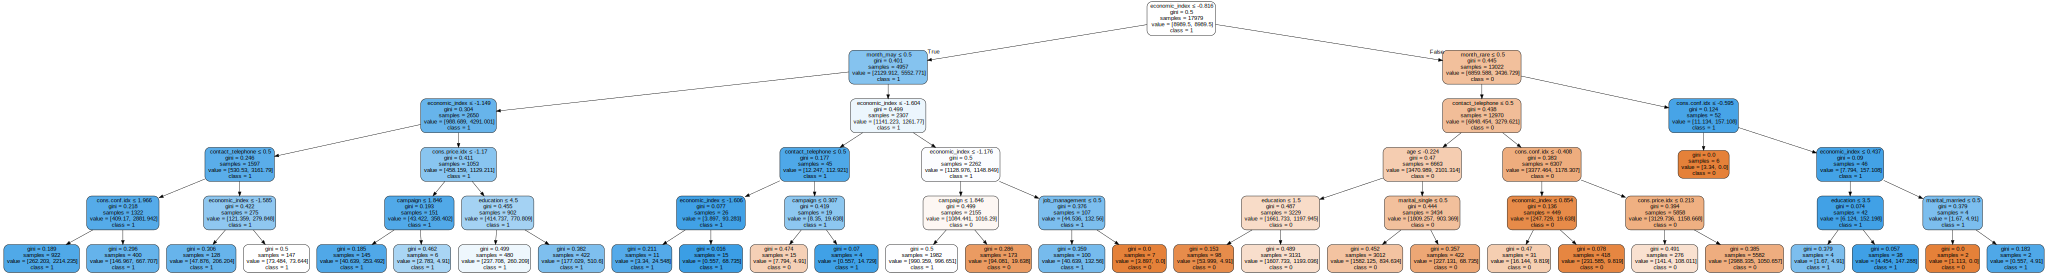

In [119]:
# Visualize the model
feature_names = dtree_pipe2_opt.named_steps['transformer'].get_feature_names_out()
clean_names = [i.split('__')[-1] for i in feature_names]

dot_data = export_graphviz(dtree_pipe2_opt.named_steps['dtree'],
                           out_file=None,
                           feature_names=clean_names,
                           class_names=['0','1'],
                           filled=True,
                           rounded=True,
                           special_characters=True
)
graph=graphviz.Source(dot_data)
graph

In [120]:
# Generate classification report D2
y_pred_D2 = dtree_pipe2_opt.predict(X_test)

print(classification_report(y_test, y_pred_D2))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      4037
           1       0.23      0.62      0.33       458

    accuracy                           0.75      4495
   macro avg       0.59      0.69      0.59      4495
weighted avg       0.87      0.75      0.79      4495



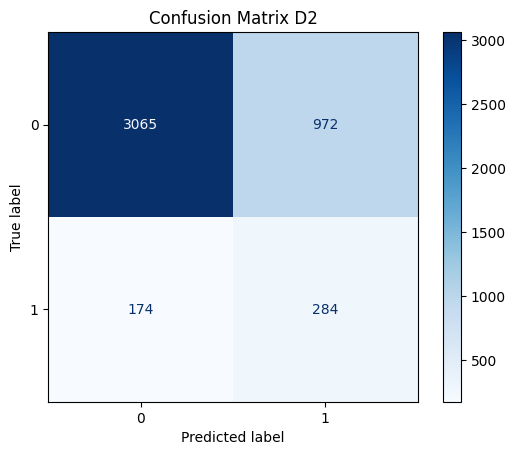

In [121]:
# Display confusion matrix D2
conf_matrix_D2 = confusion_matrix(y_test, y_pred_D2)
disp_D2 = ConfusionMatrixDisplay(conf_matrix_D2, display_labels=['0','1'])
disp_D2.plot(cmap='Blues')
plt.title('Confusion Matrix D2')
plt.show()

In [122]:
# Values for false positive (fp_D2), false negative (fn_D2), true positive (tp_D2) and true negative (tn_D2)
fp_D2 = conf_matrix_D2[0][1]
fn_D2 = conf_matrix_D2[1][0]
tp_D2 = conf_matrix_D2[1][1]
tn_D2 = conf_matrix_D2[0][0]

print(f' fp_D2: {fp_D2} \n fn_D2: {fn_D2} \n tp_D2: {tp_D2} \n tn_D2: {tn_D2}')

 fp_D2: 972 
 fn_D2: 174 
 tp_D2: 284 
 tn_D2: 3065


In [123]:
# Calculations for accuracy, precision, recall
accuracy_D2 = (tp_D2 + tn_D2)/len(y_test)
precision_D2 = tp_D2/(tp_D2 + fp_D2)
recall_D2 = tp_D2/(tp_D2 + fn_D2)

print(f'Accuracy: {accuracy_D2:.2f}')
print(f'Precision: {precision_D2:.2f}')
print(f'Recall: {recall_D2:.2f}')
print(f'-'*28)

Accuracy: 0.75
Precision: 0.23
Recall: 0.62
----------------------------


In [124]:
# Calculate F2 score
beta = 2
F2_score_D2 = (1 + beta**2) * (precision_D2 * recall_D2) / (beta**2 * precision_D2 + recall_D2)

print(f'The F2 score is {F2_score_D2:.4f}')

The F2 score is 0.4598


In [125]:
# Profit/loss analysis
Profit_Loss_D2 = tp_D2*(L - C) - fp_D2*C - fn_D2*L

print(f'The profit or loss is ${Profit_Loss_D2}')

The profit or loss is $-20360


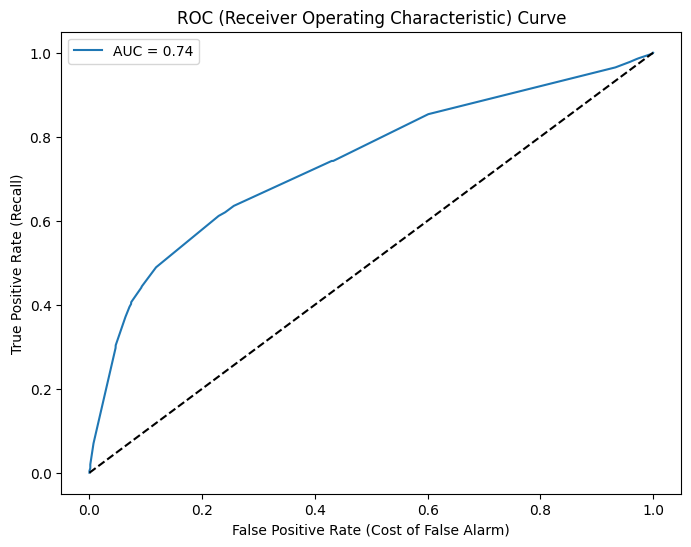

In [126]:
# Plot the ROC Curve
y_probs_D2 = dtree_pipe2_opt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_D2)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs_D2):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

**Find the optimal threshold**     
The optimal threshold is a careful balance between precision and recall.    
_Youden's J Statistic_     
This method to find the optimal threshold from the ROC curve maximizes the vertical distance from the diagonal line or line of random guessing. However, this assumes that the cost of false positive (wrongly flagging a client might be a subscriber) is the same as a false negative (missing a client who is subscribing). For example, if missing a subscriber costs a lot more than wrongly flagging a client as a subscriber, the threshold should be lowered (move higher on the ROC curve) and move away from the 'Youden point' or optimal threshold.

In [127]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_D2 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold_D2 :.4f}')

The optimal threshold is 0.5016


In [128]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_D2)
avg_precision = average_precision_score(y_test, y_probs_D2)

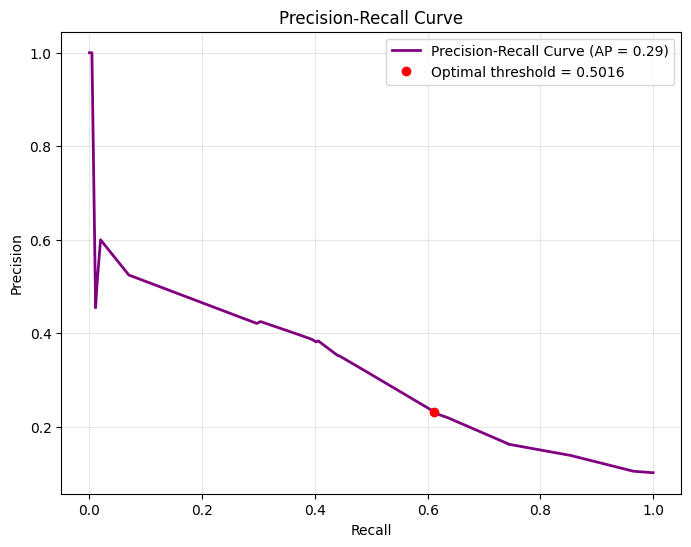

In [129]:
# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold_D2))
plt.plot(recall[idx], precision[idx], 'ro', label='Optimal threshold = 0.5016')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

**Evaluate precision and recall at different thresholds**     
As shown in the table below, recall improves to 94% when threshold is lowered to 0.25.

In [130]:
# Evaluate precision and recall at different thresholds
thresholds = np.arange(0.05, 0.70, 0.05)
for threshold in thresholds:
    preds = (y_probs_D2 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y_test, preds):.2f} | Recall={recall_score(y_test, preds):.2f}')

Threshold=0.05 | Precision=0.10 | Recall=0.99
Threshold=0.10 | Precision=0.10 | Recall=0.98
Threshold=0.15 | Precision=0.10 | Recall=0.98
Threshold=0.20 | Precision=0.10 | Recall=0.98
Threshold=0.25 | Precision=0.11 | Recall=0.97
Threshold=0.30 | Precision=0.14 | Recall=0.85
Threshold=0.35 | Precision=0.16 | Recall=0.74
Threshold=0.40 | Precision=0.16 | Recall=0.74
Threshold=0.45 | Precision=0.23 | Recall=0.62
Threshold=0.50 | Precision=0.23 | Recall=0.62
Threshold=0.55 | Precision=0.35 | Recall=0.44
Threshold=0.60 | Precision=0.35 | Recall=0.44
Threshold=0.65 | Precision=0.35 | Recall=0.44


In [131]:
# Determine the threshold that maximizes profit
profits = []
L = 500
C = 60
for t in thresholds:
    y_pred = (y_probs_D2 >= t).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.3


In [132]:
# Use the threshold that maximizes profit
y_pred_D3 = (y_probs_D2 >= best_threshold).astype(int)

In [133]:
# Generate classification report D3

print(classification_report(y_test, y_pred_D3))

              precision    recall  f1-score   support

           0       0.96      0.40      0.56      4037
           1       0.14      0.85      0.24       458

    accuracy                           0.45      4495
   macro avg       0.55      0.63      0.40      4495
weighted avg       0.88      0.45      0.53      4495



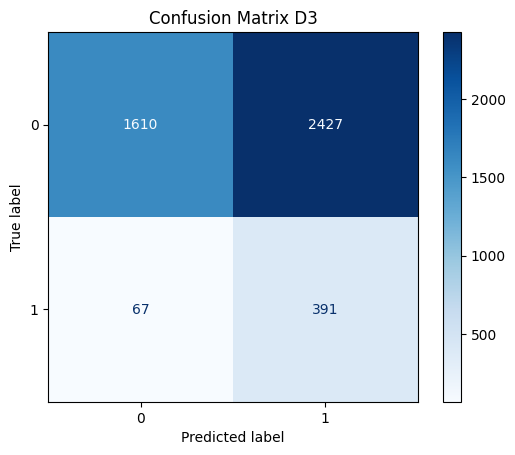

In [134]:
# Display confusion matrix D3
conf_matrix_D3 = confusion_matrix(y_test, y_pred_D3)
disp_D3 = ConfusionMatrixDisplay(conf_matrix_D3, display_labels=['0','1'])
disp_D3.plot(cmap='Blues')
plt.title('Confusion Matrix D3')
plt.show()

In [135]:
# Values for false positive (fp_D3), false negative (fn_D3), true positive (tp_D3) and true negative (tn_D3)
fp_D3 = conf_matrix_D3[0][1]
fn_D3 = conf_matrix_D3[1][0]
tp_D3 = conf_matrix_D3[1][1]
tn_D3 = conf_matrix_D3[0][0]

print(f' fp_D3: {fp_D3} \n fn_D3: {fn_D3} \n tp_D3: {tp_D3} \n tn_D3: {tn_D3}')

 fp_D3: 2427 
 fn_D3: 67 
 tp_D3: 391 
 tn_D3: 1610


In [136]:
# Calculations for accuracy, precision, recall
accuracy_D3 = (tp_D3 + tn_D3)/len(y_test)
precision_D3 = tp_D3/(tp_D3 + fp_D3)
recall_D3 = tp_D3/(tp_D3 + fn_D3)

print(f'Accuracy: {accuracy_D3:.2f}')
print(f'Precision: {precision_D3:.2f}')
print(f'Recall: {recall_D3:.2f}')
print(f'-'*28)

Accuracy: 0.45
Precision: 0.14
Recall: 0.85
----------------------------


In [137]:
# Calculate F2 score
beta = 2
F2_score_D3 = (1 + beta**2) * (precision_D3 * recall_D3) / (beta**2 * precision_D3 + recall_D3)

print(f'The F2 score is {F2_score_D3:.4f}')

The F2 score is 0.4204


In [138]:
# Profit/loss analysis
Profit_Loss_D3 = tp_D3*(L - C) - fp_D3*C - fn_D3*L

print(f'The profit or loss is ${Profit_Loss_D3}')

The profit or loss is $-7080


**Decision Tree Classifier feature importance**     
Macroeconomic conditions strongly influence customer subscription behavior (**economic_index** account for **68%** of the importances which sum up to 100%). The month of **May** is the second most important feature (**13%**) - it is a key campaign month as well as the '**rare**' months (**6%**) of April, March, September, October and December. Contact by **telephone**(**4%**) and **education** (**2%**) are also important.     
Campaign design (month and contact type) matters more than demographics and rank higher than education, age and marital status.

In [139]:
# Extract the trained tree
dt_model = dtree_pipe2_opt.named_steps['dtree']

In [140]:
# Get feature names after preprocessing
preprocessor = dtree_pipe2_opt.named_steps['transformer']
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['ordinalencoder__education', 'onehotencoder__job_blue-collar',
       'onehotencoder__job_entrepreneur', 'onehotencoder__job_housemaid',
       'onehotencoder__job_management', 'onehotencoder__job_retired',
       'onehotencoder__job_self-employed', 'onehotencoder__job_services',
       'onehotencoder__job_student', 'onehotencoder__job_technician',
       'onehotencoder__job_unemployed', 'onehotencoder__marital_married',
       'onehotencoder__marital_single', 'onehotencoder__default_yes',
       'onehotencoder__housing_yes', 'onehotencoder__loan_yes',
       'onehotencoder__contact_telephone', 'onehotencoder__month_jul',
       'onehotencoder__month_jun', 'onehotencoder__month_may',
       'onehotencoder__month_nov', 'onehotencoder__month_rare',
       'onehotencoder__day_of_week_mon', 'onehotencoder__day_of_week_thu',
       'onehotencoder__day_of_week_tue', 'onehotencoder__day_of_week_wed',
       'remainder__age', 'remainder__campaign', 'remainder__pdays',
       'remainder_

In [141]:
# Match importance to names
importances = dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
    }).sort_values(by='importance', ascending=False)

feature_importance_df.head(10)

,feature,importance
32,remainder__economic_index,0.683314
19,onehotencoder__month_may,0.127646
21,onehotencoder__month_rare,0.057526
16,onehotencoder__contact_telephone,0.044814
30,remainder__cons.price.idx,0.022949
0,ordinalencoder__education,0.019676
31,remainder__cons.conf.idx,0.015056
27,remainder__campaign,0.013499
26,remainder__age,0.009592
12,onehotencoder__marital_single,0.003146


In [142]:
# Clean feature names
feature_importance_df['feature'] = (
    feature_importance_df['feature']
    .str.replace('ordinalencoder__','')
    .str.replace('onehotencoder__','')
    .str.replace('remainder__','')
)
feature_importance_df.head(10)

,feature,importance
32,economic_index,0.683314
19,month_may,0.127646
21,month_rare,0.057526
16,contact_telephone,0.044814
30,cons.price.idx,0.022949
0,education,0.019676
31,cons.conf.idx,0.015056
27,campaign,0.013499
26,age,0.009592
12,marital_single,0.003146


 **Predicting subscription using the Decision Tree Classifier model**     
 The first prediction is a **false positive** (predicted positive while actually negative) while the second prediction is a **true positive** (predicted positive and actually positive).

In [143]:
# Obtain a sample from the test data
df_test3 = X_test[2003:2004]

print(df_test3.head().T, '\n')
print(f'The actual subscription is {list(y_test[2003:2004])[0]}') # verify subscription

                            24187
age                            54
job                        admin.
marital                   married
education       university.degree
default                        no
housing                        no
loan                           no
contact                  cellular
month                         nov
day_of_week                   mon
campaign                        1
pdays                         999
previous                        0
poutcome              nonexistent
cons.price.idx               93.2
cons.conf.idx               -42.0
economic_index           0.409154 

The actual subscription is 0


In [144]:
# Transfer the data to a dictionary
sample3 = {
    "age": 54,
    "job": "admin.",
    "marital": "married",
    "education": "university.degree",
    "default": "no",
    "housing": "no",
    "loan": "no",
    "contact": "cellular",
    "month": "nov",
    "day_of_week": "mon",
    "campaign": 1,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.2,
    "cons.conf.idx": -42.0,
    "economic_index": 0.409154
}

In [145]:
# Predict subscription probability
prob1_dtree_pipe2 = dtree_pipe2_opt.predict_proba(pd.DataFrame([sample3]))[0, 1]

if prob1_dtree_pipe2 >= 0.20:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted subscription probability is {prob1_dtree_pipe2:.2f}')

Predicted subscription is 1 

The predicted subscription probability is 0.35


In [146]:
# Obtain a sample from the test data
df_test4 = X_test[3013:3014]

print(df_test4.head().T, '\n')
print(f'The actual subscription is {list(y_test[3013:3014])[0]}') # verify subscription

                              15912
age                              28
job                      technician
marital                      single
education       professional.course
default                          no
housing                         yes
loan                             no
contact                    cellular
month                           jul
day_of_week                     mon
campaign                          3
pdays                           999
previous                          0
poutcome                nonexistent
cons.price.idx               93.918
cons.conf.idx                 -42.7
economic_index              0.75508 

The actual subscription is 1


In [147]:
# Transfer the data to a dictionary
sample4 = {
    "age": 28,
    "job": "technician",
    "marital": "single",
    "education": "professional.course",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "jul",
    "day_of_week": "mon",
    "campaign": 3,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.918,
    "cons.conf.idx": -42.7,
    "economic_index": 0.75508
}

In [148]:
# Predict subscription probability
prob2_dtree_pipe2 = dtree_pipe2_opt.predict_proba(pd.DataFrame([sample4]))[0, 1]

if prob2_dtree_pipe2 >= 0.20:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted subscription probability is {prob2_dtree_pipe2:.2f}')

Predicted subscription is 1 

The predicted subscription probability is 0.43


**Improve the K-Nearest Neighbors Classifier model**     
SMOTE is applied to address the imbalanced data.

In [149]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22474 entries, 0 to 41186
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22474 non-null  int64  
 1   job             22474 non-null  object 
 2   marital         22474 non-null  object 
 3   education       22474 non-null  object 
 4   default         22474 non-null  object 
 5   housing         22474 non-null  object 
 6   loan            22474 non-null  object 
 7   contact         22474 non-null  object 
 8   month           22474 non-null  object 
 9   day_of_week     22474 non-null  object 
 10  campaign        22474 non-null  int64  
 11  pdays           22474 non-null  int64  
 12  previous        22474 non-null  int64  
 13  poutcome        22474 non-null  object 
 14  cons.price.idx  22474 non-null  float64
 15  cons.conf.idx   22474 non-null  float64
 16  y               22474 non-null  int64  
 17  economic_index  22474 non-null  floa

In [150]:
# Define X and y
X = df.drop(['y'], axis=1)
y = df['y']

In [151]:
# Verify categorical features for encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [152]:
# Define the ordinal and nominal features
ordinal_features = ['education']
nominal_features = ['job','marital','default','housing','loan','contact','month','day_of_week','poutcome']

In [153]:
# Prepare the ordinal encoder
ordinal_encoder = OrdinalEncoder(
    categories=[
      ['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course']
    ]
)

In [154]:
# Prepare the transformer for encoding categorical data and scaling the rest
transformer = make_column_transformer(
    (ordinal_encoder, ordinal_features),
    (OneHotEncoder(handle_unknown='ignore'), nominal_features),
    remainder=StandardScaler()
)
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'university.degree',
                                                             'professional.course']]),
                                 ['education']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week',
                                  'poutcome'])])

In [155]:
# Build pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

knn_pipe2 = ImbPipeline(steps=[
    ('transformer', transformer),
    ('smote', SMOTE(
        sampling_strategy=0.8,
        k_neighbors=3,
        random_state=42
    )),
    ('knn', KNeighborsClassifier())
])

In [156]:
# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [157]:
# Fit the model
knn_pipe2.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('smote',
                 SMOTE(k_neighbors=3, random_state=42, sampling_strategy=0.8)),
                ('knn', KNeighborsClassifier())])

In [158]:
# Set up parameter grid
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]
}

In [159]:
# Run GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_knn = GridSearchCV(
    estimator=knn_pipe2,
    param_grid=param_grid_knn,
    cv=cv,
    n_jobs=-1,
    scoring='roc_auc',
    error_score='raise'
)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['illiterate',
                                                                                                     'basic.4y',
                                                                                                     'basic.6y',
                                                                                                     'basic.9y',
                                                                                                     'high.school',
                                                                                                     'university.degree',
                                                                                                     'professional.course']]),
                                                                         ['educ...
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('smote',
                                        SMOTE(k_neighbors=3, random_state=42,
                                              sampling_strategy=0.8)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5, 7, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [160]:
# Verify best parameters and best score

print(f'The best parameters are {grid_knn.best_params_}')
print(f'The best score is {grid_knn.best_score_:.4f}')

The best parameters are {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}
The best score is 0.6834


In [161]:
# Access the optimized dtree_pipe2 pipeline model
knn_pipe2_opt = grid_knn.best_estimator_
knn_pipe2_opt

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('smote',
                 SMOTE(k_neighbors=3, random_state=42, sampling_strategy=0.8)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=11,
                                      p=1))])

In [162]:
# Accuracy of knn_pipe2_opt on train and test data
knn_pipe2_opt_acc_train = knn_pipe2_opt.score(X_train, y_train)
knn_pipe2_opt_acc_test = knn_pipe2_opt.score(X_test, y_test)

print(f'The train accuracy of the model is {knn_pipe2_opt_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {knn_pipe2_opt_acc_test*100:.2f}%')

The train accuracy of the model is 85.27%
The test accuracy of the model is 77.78%


In [163]:
# Generate classification report K2
y_pred_K2 = knn_pipe2_opt.predict(X_test)

print(classification_report(y_test, y_pred_K2))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4037
           1       0.22      0.46      0.30       458

    accuracy                           0.78      4495
   macro avg       0.58      0.64      0.58      4495
weighted avg       0.86      0.78      0.81      4495



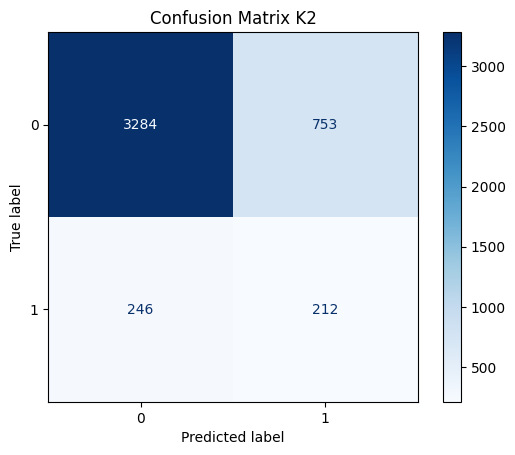

In [164]:
# Display confusion matrix K2
conf_matrix_K2 = confusion_matrix(y_test, y_pred_K2)
disp_K2 = ConfusionMatrixDisplay(conf_matrix_K2, display_labels=['0','1'])
disp_K2.plot(cmap='Blues')
plt.title('Confusion Matrix K2')
plt.show()

In [165]:
# Values for false positive (fp_K2), false negative (fn_K2), true positive (tp_K2) and true negative (tn_K2)
fp_K2 = conf_matrix_K2[0][1]
fn_K2 = conf_matrix_K2[1][0]
tp_K2 = conf_matrix_K2[1][1]
tn_K2 = conf_matrix_K2[0][0]

print(f' fp_K2: {fp_K2} \n fn_K2: {fn_K2} \n tp_K2: {tp_K2} \n tn_K2: {tn_K2}')

 fp_K2: 753 
 fn_K2: 246 
 tp_K2: 212 
 tn_K2: 3284


In [166]:
# Calculations for accuracy, precision, recall
accuracy_K2 = (tp_K2 + tn_K2)/len(y_test)
precision_K2 = tp_K2/(tp_K2 + fp_K2)
recall_K2 = tp_K2/(tp_K2 + fn_K2)

print(f'Accuracy: {accuracy_K2:.2f}')
print(f'Precision: {precision_K2:.2f}')
print(f'Recall: {recall_K2:.2f}')
print(f'-'*28)

Accuracy: 0.78
Precision: 0.22
Recall: 0.46
----------------------------


In [167]:
# Calculate F2 score
beta = 2
F2_score_K2 = (1 + beta**2) * (precision_K2 * recall_K2) / (beta**2 * precision_K2 + recall_K2)

print(f'The F2 score is {F2_score_K2:.4f}')

The F2 score is 0.3790


In [168]:
# Profit/loss analysis
Profit_Loss_K2 = tp_K2*(L - C) - fp_K2*C - fn_K2*L

print(f'The profit or loss is ${Profit_Loss_K2}')

The profit or loss is $-74900


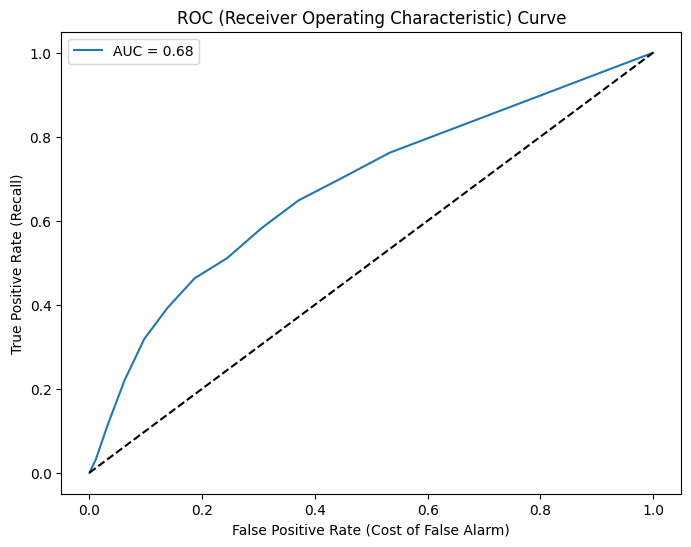

In [169]:
# Plot the ROC Curve
y_probs_K2 = knn_pipe2_opt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_K2)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs_K2):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [170]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_K2 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold_K2 :.4f}')

The optimal threshold is 0.2727


In [171]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_K2)
avg_precision = average_precision_score(y_test, y_probs_K2)

In [172]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_K2)
avg_precision = average_precision_score(y_test, y_probs_K2)

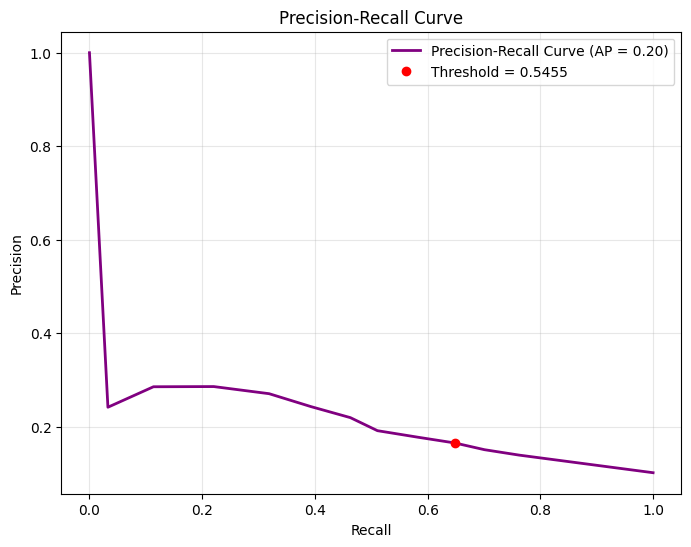

In [173]:
# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold_K2))
plt.plot(recall[idx], precision[idx], 'ro', label='Threshold = 0.5455')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

In [174]:
# Evaluate precision and recall at different thresholds
thresholds = np.arange(-0.05, 0.70, 0.05)
for threshold in thresholds:
    preds = (y_probs_K2 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y_test, preds):.2f} | Recall={recall_score(y_test, preds):.2f}')

Threshold=-0.05 | Precision=0.10 | Recall=1.00
Threshold=0.00 | Precision=0.10 | Recall=1.00
Threshold=0.05 | Precision=0.14 | Recall=0.76
Threshold=0.10 | Precision=0.15 | Recall=0.70
Threshold=0.15 | Precision=0.15 | Recall=0.70
Threshold=0.20 | Precision=0.17 | Recall=0.65
Threshold=0.25 | Precision=0.17 | Recall=0.65
Threshold=0.30 | Precision=0.18 | Recall=0.58
Threshold=0.35 | Precision=0.18 | Recall=0.58
Threshold=0.40 | Precision=0.19 | Recall=0.51
Threshold=0.45 | Precision=0.19 | Recall=0.51
Threshold=0.50 | Precision=0.22 | Recall=0.46
Threshold=0.55 | Precision=0.24 | Recall=0.39
Threshold=0.60 | Precision=0.24 | Recall=0.39
Threshold=0.65 | Precision=0.27 | Recall=0.32


In [175]:
# Determine the threshold that maximizes profit
profits = []
L = 500
C = 60
for t in thresholds:
    y_pred = (y_probs_K2 >= t).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.05


In [176]:
# Use the threshold that maximizes profit
y_pred_K3 = (y_probs_K2 >= best_threshold).astype(int)

In [177]:
# Generate classification report K2

print(classification_report(y_test, y_pred_K3))

              precision    recall  f1-score   support

           0       0.95      0.47      0.63      4037
           1       0.14      0.76      0.24       458

    accuracy                           0.50      4495
   macro avg       0.54      0.61      0.43      4495
weighted avg       0.86      0.50      0.59      4495



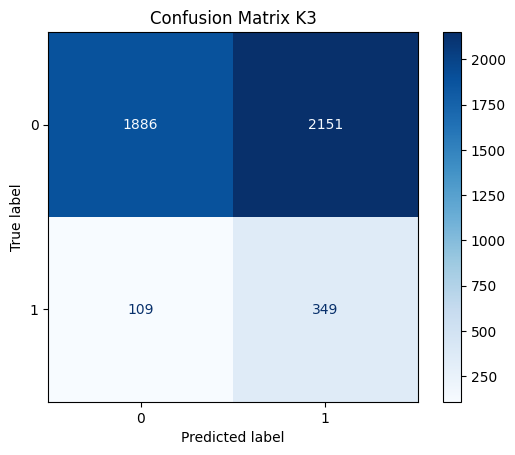

In [178]:
# Display confusion matrix K3
conf_matrix_K3 = confusion_matrix(y_test, y_pred_K3)
disp_K3 = ConfusionMatrixDisplay(conf_matrix_K3, display_labels=['0','1'])
disp_K3.plot(cmap='Blues')
plt.title('Confusion Matrix K3')
plt.show()

In [179]:
# Values for false positive (fp_K3), false negative (fn_K3), true positive (tp_K3) and true negative (tn_K3)
fp_K3 = conf_matrix_K3[0][1]
fn_K3 = conf_matrix_K3[1][0]
tp_K3 = conf_matrix_K3[1][1]
tn_K3 = conf_matrix_K3[0][0]

print(f' fp_K3: {fp_K3} \n fn_K3: {fn_K3} \n tp_K3: {tp_K3} \n tn_K3: {tn_K3}')

 fp_K3: 2151 
 fn_K3: 109 
 tp_K3: 349 
 tn_K3: 1886


In [180]:
# Calculations for accuracy, precision, recall
accuracy_K3 = (tp_K3 + tn_K3)/len(y_test)
precision_K3 = tp_K3/(tp_K3 + fp_K3)
recall_K3 = tp_K3/(tp_K3 + fn_K3)

print(f'Accuracy: {accuracy_K3:.2f}')
print(f'Precision: {precision_K3:.2f}')
print(f'Recall: {recall_K3:.2f}')
print(f'-'*28)

Accuracy: 0.50
Precision: 0.14
Recall: 0.76
----------------------------


In [181]:
# Calculate F2 score
beta = 2
F2_score_K3 = (1 + beta**2) * (precision_K3 * recall_K3) / (beta**2 * precision_K3 + recall_K3)

print(f'The F2 score is {F2_score_K3:.4f}')

The F2 score is 0.4028


In [182]:
# Profit/loss analysis
Profit_Loss_K3 = tp_K3*(L - C) - fp_K3*C - fn_K3*L

print(f'The profit or loss is ${Profit_Loss_K3}')

The profit or loss is $-30000


**Feature importance in K-Neighbors Classifier using permutation importance**      
Feature importance in KNN is inferred using permutation importance where one feature is shuffled randomly at a time. The change in model performance is then measured - the drop in performance, for example, is inferred as the magnitude of feature importance.     

**month	0.023** has the largest drop in performance and is, therefore, the most important feature - season has a strong influence     

**day_of_week	0.016**  weekly calling patterns matter     

**nr.employed	0.016**  the number employed also matter     

**contact	0.015**  the contact channel has an effect     

**cons.conf.idx	0.011**  consumer confidence has minor influence     

**job	0.011**  demographics have weak effect     

**campaign	0.009**  the number of contacts matters slightly     

**age	0.007**  age plays a minor role     

**euribor3m	0.005**  surprisingly low compared with the other models     

**cons.price.idx	0.004**  lowest importance, almost negligible


In [183]:
# Set up permutation importance

r = permutation_importance(
    estimator=knn_pipe2_opt,
    X=X_test,
    y=y_test,
    scoring='roc_auc',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

In [184]:
# Build the importances dataframe
knn_importances_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': r.importances_mean
}).sort_values(by='importance', ascending=False)

knn_importances_df.head(10)

,feature,importance
8,month,0.029186
16,economic_index,0.029046
7,contact,0.016857
15,cons.conf.idx,0.013793
9,day_of_week,0.010822
10,campaign,0.008358
14,cons.price.idx,0.007411
1,job,0.007020
0,age,0.005131
3,education,0.001562


 **Predicting subscription using the K-Neighbors Classifier model**     
 The first prediction is a **false positive** (predicted positive while actually negative) while the second prediction is a **false negative** (predicted negative while actually positive).

---



---



In [185]:
# Obtain a sample from the test data
df_test5 = X_test[2503:2504]

print(df_test5.head().T, '\n')
print(f'The actual subscription is {list(y_test[2503:2504])[0]}') # verify subscription

                            13055
age                            35
job                        admin.
marital                   married
education       university.degree
default                        no
housing                        no
loan                           no
contact                  cellular
month                         jul
day_of_week                   tue
campaign                        2
pdays                         999
previous                        0
poutcome              nonexistent
cons.price.idx             93.918
cons.conf.idx               -42.7
economic_index           0.786153 

The actual subscription is 0


In [186]:
# Transfer the data to a dictionary
sample5 = {
    "age": 35,
    "job": "admin.",
    "marital": "married",
    "education": "university.degree",
    "default": "no",
    "housing": "no",
    "loan": "no",
    "contact": "cellular",
    "month": "jul",
    "day_of_week": "tue",
    "campaign": 2,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.918,
    "cons.conf.idx": -42.7,
    "economic_index": 0.786153
}

In [187]:
# Predict subscription probability
prob1_knn_pipe2 = knn_pipe2_opt.predict_proba(pd.DataFrame([sample5]))[0, 1]

if prob1_knn_pipe2 >= 0.05:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted subscription probability is {prob1_knn_pipe2:.2f}')

Predicted subscription is 1 

The predicted subscription probability is 0.27


In [188]:
# Obtain a sample from the test data
df_test6 = X_test[2421:2422]

print(df_test6.head().T, '\n')
print(f'The actual subscription is {list(y_test[2421:2422])[0]}') # verify subscription

                      27181
age                      40
job             blue-collar
marital            divorced
education          basic.9y
default                  no
housing                 yes
loan                     no
contact            cellular
month                   nov
day_of_week             fri
campaign                  1
pdays                   999
previous                  0
poutcome        nonexistent
cons.price.idx         93.2
cons.conf.idx         -42.0
economic_index     0.382561 

The actual subscription is 1


In [189]:
# Transfer the data to a dictionary
sample6 = {
    "age": 40,
    "job": "blue-collar",
    "marital": "divorced",
    "education": "basic.9y",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "nov",
    "day_of_week": "fri",
    "campaign": 1,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.2,
    "cons.conf.idx": -42.0,
    "economic_index": 0.382561
}

In [190]:
# Predict subscription probability
prob2_knn_pipe2 = knn_pipe2_opt.predict_proba(pd.DataFrame([sample6]))[0, 1]

if prob2_knn_pipe2 >= 0.05:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted subscription probability is {prob2_knn_pipe2:.2f}')

Predicted subscription is 0 

The predicted subscription probability is 0.00


**Improve the Support Vector Classifier (SVC) model**     
Use the parameter class_weight='balanced' to address the imbalanced dataset.

In [191]:
# Prepare the transformer for encoding categorical data and scaling the rest
transformer = make_column_transformer(
    (ordinal_encoder, ordinal_features),
    (OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_features),
    remainder=StandardScaler()
)
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['illiterate',
                                                             'basic.4y',
                                                             'basic.6y',
                                                             'basic.9y',
                                                             'high.school',
                                                             'university.degree',
                                                             'professional.course']]),
                                 ['education']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week',
                                  'poutcome'])])

In [192]:
# Use the parameter class_weight='balanced' to address the imbalanced dataset
svc_pipe2 = Pipeline([
    ('transformer', transformer),
    ('svc', SVC(class_weight='balanced', random_state=42))
])
svc_pipe2.fit(X1_train, y1_train)
svc_pipe2

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [193]:
# Define parameter grid
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 0.01, 0.1]
}

In [194]:
# Run RandomizedSearchCV
grid_svc = RandomizedSearchCV(
    estimator=svc_pipe2,
    param_distributions=param_grid_svc,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_svc.fit(X1_train, y1_train)

print(f'The best parameters are {grid_svc.best_params_}')
print(f'The best score is {grid_svc.best_score_:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are {'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__C': 0.1}
The best score is 0.3818


In [195]:
# Access the optimized dtree_pipe2 pipeline model
svc_pipe2_opt = grid_svc.best_estimator_
svc_pipe2_opt

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'university.degree',
                                                                              'professional.course']]),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     random_state=42))])

In [196]:
# Accuracy of svc_pipe2_opt on train and test data
svc_pipe2_opt_acc_train = svc_pipe2_opt.score(X1_train, y1_train)
svc_pipe2_opt_acc_test = svc_pipe2_opt.score(X1_test, y1_test)

print(f'The train accuracy of the model is {svc_pipe2_opt_acc_train*100:.2f}%')
print(f'The test accuracy of the model is {svc_pipe2_opt_acc_test*100:.2f}%')

The train accuracy of the model is 86.16%
The test accuracy of the model is 85.32%


In [197]:
# Generate classification report S2
y_pred_S2 = svc_pipe2_opt.predict(X1_test)

print(classification_report(y1_test, y_pred_S2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       435
           1       0.27      0.40      0.33        42

    accuracy                           0.85       477
   macro avg       0.61      0.65      0.62       477
weighted avg       0.88      0.85      0.87       477



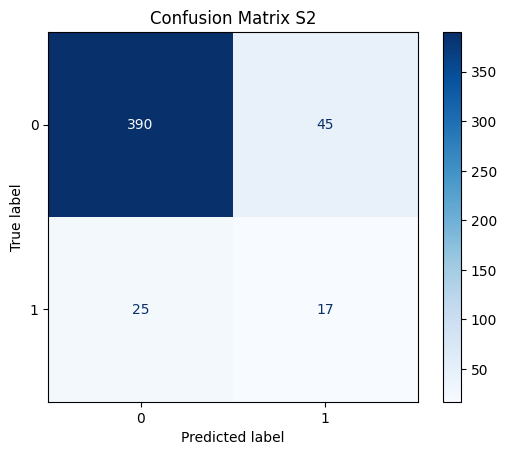

In [198]:
# Display confusion matrix S2
conf_matrix_S2 = confusion_matrix(y1_test, y_pred_S2)
disp_S2 = ConfusionMatrixDisplay(conf_matrix_S2, display_labels=['0','1'])
disp_S2.plot(cmap='Blues')
plt.title('Confusion Matrix S2')
plt.show()

In [199]:
# Values for false positive (fp_S2), false negative (fn_S2), true positive (tp_S2) and true negative (tn_S2)
fp_S2 = conf_matrix_S2[0][1]
fn_S2 = conf_matrix_S2[1][0]
tp_S2 = conf_matrix_S2[1][1]
tn_S2 = conf_matrix_S2[0][0]

print(f' fp_S2: {fp_S2} \n fn_S2: {fn_S2} \n tp_S2: {tp_S2} \n tn_S2: {tn_S2}')

 fp_S2: 45 
 fn_S2: 25 
 tp_S2: 17 
 tn_S2: 390


In [200]:
# Calculations for accuracy, precision, recall
accuracy_S2 = (tp_S2 + tn_S2)/len(y1_test)
precision_S2 = tp_S2/(tp_S2 + fp_S2)
recall_S2 = tp_S2/(tp_S2 + fn_S2)

print(f'Accuracy: {accuracy_S2:.2f}')
print(f'Precision: {precision_S2:.2f}')
print(f'Recall: {recall_S2:.2f}')
print(f'-'*28)

Accuracy: 0.85
Precision: 0.27
Recall: 0.40
----------------------------


In [201]:
# Calculate F2 score
beta = 2
F2_score_S2 = (1 + beta**2) * (precision_S2 * recall_S2) / (beta**2 * precision_S2 + recall_S2)

print(f'The F2 score is {F2_score_S2:.4f}')

The F2 score is 0.3696


In [202]:
# Profit/loss analysis
Profit_Loss_S2 = tp_S2*(L - C) - fp_S2*C - fn_S2*L

print(f'The profit or loss is ${Profit_Loss_S2}')

The profit or loss is $-7720


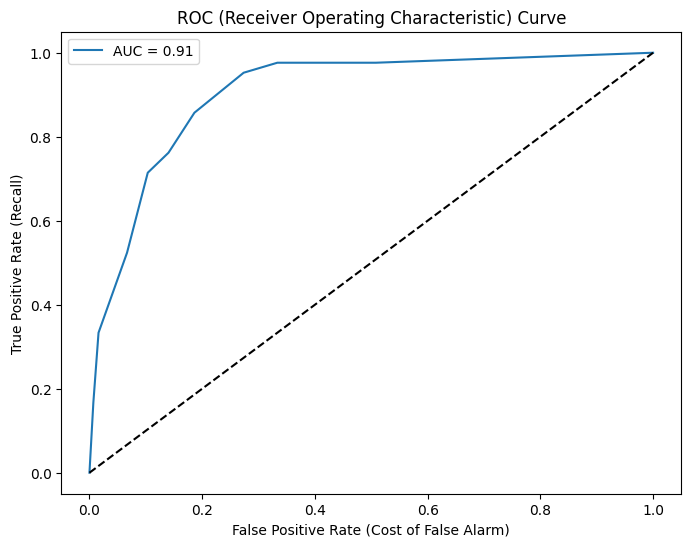

In [203]:
# Plot the ROC Curve
y_probs_S2 = knn_pipe2_opt.predict_proba(X1_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y_probs_S2)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y1_test, y_probs_S2):.2f}')
plt.plot([0,1], [0,1], 'k--') # diagonal line representing random guessing
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.xlabel('False Positive Rate (Cost of False Alarm)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [204]:
# Find the optimal threshold from the ROC Curve that maximizes Youden's J
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_S2 = thresholds[optimal_idx]

print(f'The optimal threshold is {optimal_threshold_S2 :.4f}')

The optimal threshold is 0.3636


In [205]:
# Use the optimal threshold of 0.3636
y_pred_S21 = (y_probs_S2 >= 0.3636).astype(int)

In [206]:
# Generate classification report S21

print(classification_report(y1_test, y_pred_S21))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       435
           1       0.25      0.95      0.40        42

    accuracy                           0.75       477
   macro avg       0.62      0.84      0.62       477
weighted avg       0.93      0.75      0.80       477



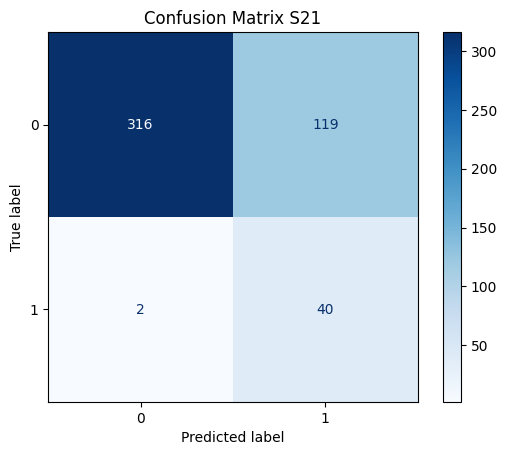

In [207]:
# Display confusion matrix S21
conf_matrix_S21 = confusion_matrix(y1_test, y_pred_S21)
disp_S21 = ConfusionMatrixDisplay(conf_matrix_S21, display_labels=['0','1'])
disp_S21.plot(cmap='Blues')
plt.title('Confusion Matrix S21')
plt.show()

In [208]:
# Values for false positive (fp_S21), false negative (fn_S21), true positive (tp_S21) and true negative (tn_S21)
fp_S21 = conf_matrix_S21[0][1]
fn_S21 = conf_matrix_S21[1][0]
tp_S21 = conf_matrix_S21[1][1]
tn_S21 = conf_matrix_S21[0][0]

print(f' fp_S21: {fp_S21} \n fn_S21: {fn_S21} \n tp_S21: {tp_S21} \n tn_S21: {tn_S21}')

 fp_S21: 119 
 fn_S21: 2 
 tp_S21: 40 
 tn_S21: 316


In [209]:
# Calculations for accuracy, precision, recall
accuracy_S21 = (tp_S21 + tn_S21)/len(y1_test)
precision_S21 = tp_S21/(tp_S21 + fp_S21)
recall_S21 = tp_S21/(tp_S21 + fn_S21)

print(f'Accuracy: {accuracy_S21:.2f}')
print(f'Precision: {precision_S21:.2f}')
print(f'Recall: {recall_S21:.2f}')
print(f'-'*28)

Accuracy: 0.75
Precision: 0.25
Recall: 0.95
----------------------------


In [210]:
# Calculate F2 score
beta = 2
F2_score_S21 = (1 + beta**2) * (precision_S21 * recall_S21) / (beta**2 * precision_S21 + recall_S21)

print(f'The F2 score is {F2_score_S21:.4f}')

The F2 score is 0.6116


In [211]:
# Profit/loss analysis
Profit_Loss_S21_unadjusted = tp_S21*(L - C) - fp_S21*C - fn_S21*L

# adjust for the smaller dataset
Profit_Loss_S21 = Profit_Loss_S21_unadjusted*len(df)/len(df1)

print(f'The profit or loss unadjusted is ${int(Profit_Loss_S21_unadjusted)}')
print(f'The profit or loss adjusted is ${int(Profit_Loss_S21)}')

The profit or loss unadjusted is $9460
The profit or loss adjusted is $89179


In [212]:
# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y1_test, y_probs_S2)
avg_precision = average_precision_score(y1_test, y_probs_S2)

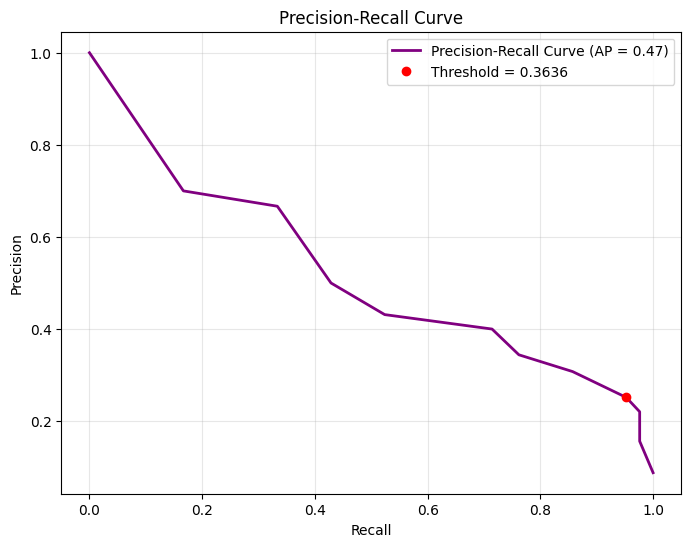

In [213]:
# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})', color='purple', lw=2)
# Mark the optimal threshold on the plot
idx = np.argmin(np.abs(thresholds-optimal_threshold_S2))
plt.plot(recall[idx], precision[idx], 'ro', label='Threshold = 0.3636')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

In [214]:
# Evaluate precision and recall at different thresholds
thresholds = np.arange(0.05, 0.70, 0.05)
for threshold in thresholds:
    preds = (y_probs_S2 >= threshold).astype(int)
    print(f'Threshold={threshold:.2f} | Precision={precision_score(y1_test, preds):.2f} | Recall={recall_score(y1_test, preds):.2f}')

Threshold=0.05 | Precision=0.16 | Recall=0.98
Threshold=0.10 | Precision=0.19 | Recall=0.98
Threshold=0.15 | Precision=0.19 | Recall=0.98
Threshold=0.20 | Precision=0.22 | Recall=0.98
Threshold=0.25 | Precision=0.22 | Recall=0.98
Threshold=0.30 | Precision=0.25 | Recall=0.95
Threshold=0.35 | Precision=0.25 | Recall=0.95
Threshold=0.40 | Precision=0.31 | Recall=0.86
Threshold=0.45 | Precision=0.31 | Recall=0.86
Threshold=0.50 | Precision=0.34 | Recall=0.76
Threshold=0.55 | Precision=0.40 | Recall=0.71
Threshold=0.60 | Precision=0.40 | Recall=0.71
Threshold=0.65 | Precision=0.43 | Recall=0.52


In [215]:
# Determine the threshold that maximizes profit
profits = []
L = 500
C = 60
for t in thresholds:
    y_pred = (y_probs_S2 >= t).astype(int)
    conf_matrix = confusion_matrix(y1_test, y_pred)
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    Profit_Loss = tp*(L - C) - fp*C - fn*L
    profits.append(Profit_Loss)

best_threshold = thresholds[np.argmax(profits)]
print(f'The threshold that maximizes profit is {best_threshold}')

The threshold that maximizes profit is 0.3


In [216]:
# Use the threshold that maximizes profit
y_pred_S3 = (y_probs_S2 >= best_threshold).astype(int)

In [217]:
# Generate classification report S3

print(classification_report(y1_test, y_pred_S3))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       435
           1       0.25      0.95      0.40        42

    accuracy                           0.75       477
   macro avg       0.62      0.84      0.62       477
weighted avg       0.93      0.75      0.80       477



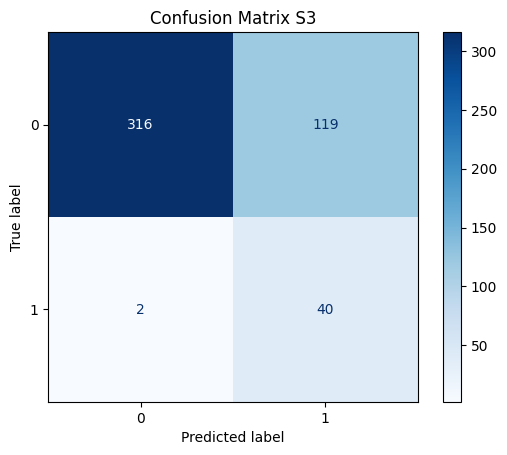

In [218]:
# Display confusion matrix S3
conf_matrix_S3 = confusion_matrix(y1_test, y_pred_S3)
disp_S3 = ConfusionMatrixDisplay(conf_matrix_S3, display_labels=['0','1'])
disp_S3.plot(cmap='Blues')
plt.title('Confusion Matrix S3')
plt.show()

In [219]:
# Values for false positive (fp_S3), false negative (fn_S3), true positive (tp_S3) and true negative (tn_S3)
fp_S3 = conf_matrix_S3[0][1]
fn_S3 = conf_matrix_S3[1][0]
tp_S3 = conf_matrix_S3[1][1]
tn_S3 = conf_matrix_S3[0][0]

print(f' fp_S3: {fp_S3} \n fn_S3: {fn_S3} \n tp_S3: {tp_S3} \n tn_S3: {tn_S3}')

 fp_S3: 119 
 fn_S3: 2 
 tp_S3: 40 
 tn_S3: 316


In [220]:
# Calculations for accuracy, precision, recall
accuracy_S3 = (tp_S3 + tn_S3)/len(y1_test)
precision_S3 = tp_S3/(tp_S3 + fp_S3)
recall_S3 = tp_S3/(tp_S3 + fn_S3)

print(f'Accuracy: {accuracy_S3:.2f}')
print(f'Precision: {precision_S3:.2f}')
print(f'Recall: {recall_S3:.2f}')
print(f'-'*28)

Accuracy: 0.75
Precision: 0.25
Recall: 0.95
----------------------------


In [221]:
# Calculate F2 score
beta = 2
F2_score_S3 = (1 + beta**2) * (precision_S3 * recall_S3) / (beta**2 * precision_S3 + recall_S3)

print(f'The F2 score is {F2_score_S3:.4f}')

The F2 score is 0.6116


In [222]:
# Profit/loss analysis
Profit_Loss_S3_unadjusted = tp_S3*(L - C) - fp_S3*C - fn_S3*L

# adjust for the smaller dataset
Profit_Loss_S3 = Profit_Loss_S3_unadjusted*len(df)/len(df1)

print(f'The profit or loss unadjusted is ${int(Profit_Loss_S3_unadjusted)}')
print(f'The profit or loss adjusted is ${int(Profit_Loss_S3)}')

The profit or loss unadjusted is $9460
The profit or loss adjusted is $89179


**Subscription Odds from the Support Vector Classifier (SVC) model**  

The subscription odds are shown in the dataframe of coefficients, odds ratios and percentage changes. For numeric features like **cons.price.idx**, a unit increase of the feature increases the odds of subscription by 31% assuming that the other variables remain constant. For categorical features like **month_rare**, the odds of subscription are 46% relative to the reference feature which in this case is the month of August.


In [223]:
# Extract the coefficients and feature names
coefs_svc = svc_pipe2_opt.named_steps['svc'].coef_[0]
feature_names_svc = svc_pipe2_opt.named_steps['transformer'].get_feature_names_out()

In [224]:
# Match the coefficients and feature names
coefs_svc_df = pd.DataFrame({'feature': feature_names_svc,
                             'coef': coefs_svc}).sort_values(by='coef', ascending=False)

print(coefs_svc_df)

                             feature      coef
20         onehotencoder__month_rare  0.380244
29         remainder__cons.price.idx  0.273347
30          remainder__cons.conf.idx  0.080044
22    onehotencoder__day_of_week_thu  0.076722
12     onehotencoder__marital_single  0.071799
5         onehotencoder__job_retired  0.053738
23    onehotencoder__day_of_week_tue  0.051987
24    onehotencoder__day_of_week_wed  0.051559
3       onehotencoder__job_housemaid  0.046759
11    onehotencoder__marital_married  0.043956
9      onehotencoder__job_technician  0.038708
25                    remainder__age  0.033693
1     onehotencoder__job_blue-collar  0.023510
0          ordinalencoder__education  0.019381
26               remainder__campaign  0.017586
21    onehotencoder__day_of_week_mon  0.015088
8         onehotencoder__job_student  0.006718
27                  remainder__pdays  0.000000
28               remainder__previous  0.000000
14           onehotencoder__loan_yes -0.006465
7        oneh

In [225]:
# Clean feature names
coefs_svc_df['feature'] = (
    coefs_svc_df['feature']
    .str.replace('ordinalencoder__','')
    .str.replace('onehotencoder__','')
    .str.replace('remainder__','')
)

print(coefs_svc_df)

              feature      coef
20         month_rare  0.380244
29     cons.price.idx  0.273347
30      cons.conf.idx  0.080044
22    day_of_week_thu  0.076722
12     marital_single  0.071799
5         job_retired  0.053738
23    day_of_week_tue  0.051987
24    day_of_week_wed  0.051559
3       job_housemaid  0.046759
11    marital_married  0.043956
9      job_technician  0.038708
25                age  0.033693
1     job_blue-collar  0.023510
0           education  0.019381
26           campaign  0.017586
21    day_of_week_mon  0.015088
8         job_student  0.006718
27              pdays  0.000000
28           previous  0.000000
14           loan_yes -0.006465
7        job_services -0.027532
13        housing_yes -0.028895
4      job_management -0.029144
10     job_unemployed -0.064102
17          month_jun -0.077392
16          month_jul -0.134060
2    job_entrepreneur -0.176125
6   job_self-employed -0.243145
15  contact_telephone -0.449922
19          month_nov -0.755794
31     e

In [226]:
# Calculate odds ratios and percentage change in odds
coefs_svc_df['odds_ratio'] = np.exp(coefs_svc_df['coef'])
coefs_svc_df['percent_change'] = (coefs_svc_df['odds_ratio'] - 1) * 100

# Sort by coefficient
coefs_svc_df = coefs_svc_df.sort_values(by='coef', ascending=False)

print(coefs_svc_df)

              feature      coef  odds_ratio  percent_change
20         month_rare  0.380244    1.462642       46.264196
29     cons.price.idx  0.273347    1.314356       31.435622
30      cons.conf.idx  0.080044    1.083334        8.333426
22    day_of_week_thu  0.076722    1.079742        7.974226
12     marital_single  0.071799    1.074440        7.443961
5         job_retired  0.053738    1.055208        5.520783
23    day_of_week_tue  0.051987    1.053362        5.336173
24    day_of_week_wed  0.051559    1.052911        5.291116
3       job_housemaid  0.046759    1.047870        4.786970
11    marital_married  0.043956    1.044936        4.493631
9      job_technician  0.038708    1.039467        3.946697
25                age  0.033693    1.034267        3.426691
1     job_blue-collar  0.023510    1.023788        2.378827
0           education  0.019381    1.019570        1.956978
26           campaign  0.017586    1.017742        1.774158
21    day_of_week_mon  0.015088    1.015

In [227]:
# Print the head and tail

print(coefs_svc_df.head(8))
print(coefs_svc_df.tail(9))

            feature      coef  odds_ratio  percent_change
20       month_rare  0.380244    1.462642       46.264196
29   cons.price.idx  0.273347    1.314356       31.435622
30    cons.conf.idx  0.080044    1.083334        8.333426
22  day_of_week_thu  0.076722    1.079742        7.974226
12   marital_single  0.071799    1.074440        7.443961
5       job_retired  0.053738    1.055208        5.520783
23  day_of_week_tue  0.051987    1.053362        5.336173
24  day_of_week_wed  0.051559    1.052911        5.291116
              feature      coef  odds_ratio  percent_change
10     job_unemployed -0.064102    0.937910       -6.209028
17          month_jun -0.077392    0.925527       -7.447282
16          month_jul -0.134060    0.874537      -12.546255
2    job_entrepreneur -0.176125    0.838513      -16.148668
6   job_self-employed -0.243145    0.784157      -21.584250
15  contact_telephone -0.449922    0.637678      -36.232235
19          month_nov -0.755794    0.469637      -53.03625

**Plot the selected features and coefficients**

In [228]:
# Extract the list of selected features and coefficients for plotting
feature1 = coefs_svc_df.iloc[:8,0]
feature2 = coefs_svc_df.iloc[-9:,0]
features = pd.concat([feature1, feature2])
features = pd.DataFrame(features)
features_list = features.values.tolist()
features_list = [item for sublist in features_list for item in sublist]

coef1 = coefs_svc_df.iloc[:8,1]
coef2 = coefs_svc_df.iloc[-9:,1]
coefs = pd.concat([coef1, coef2])
coefs = pd.DataFrame(coefs)
coefs_list = coefs.values.tolist()
coefs_list = [item for sublist in coefs_list for item in sublist]

In [229]:
# Prepare to plot the important features and coefficients

plot_data_svc = {
    'feature': features_list,
    'coef': coefs_list
}

plot_svc_df = pd.DataFrame(plot_data_svc)
plot_svc_df = plot_svc_df.sort_values(by='coef', ascending=True)

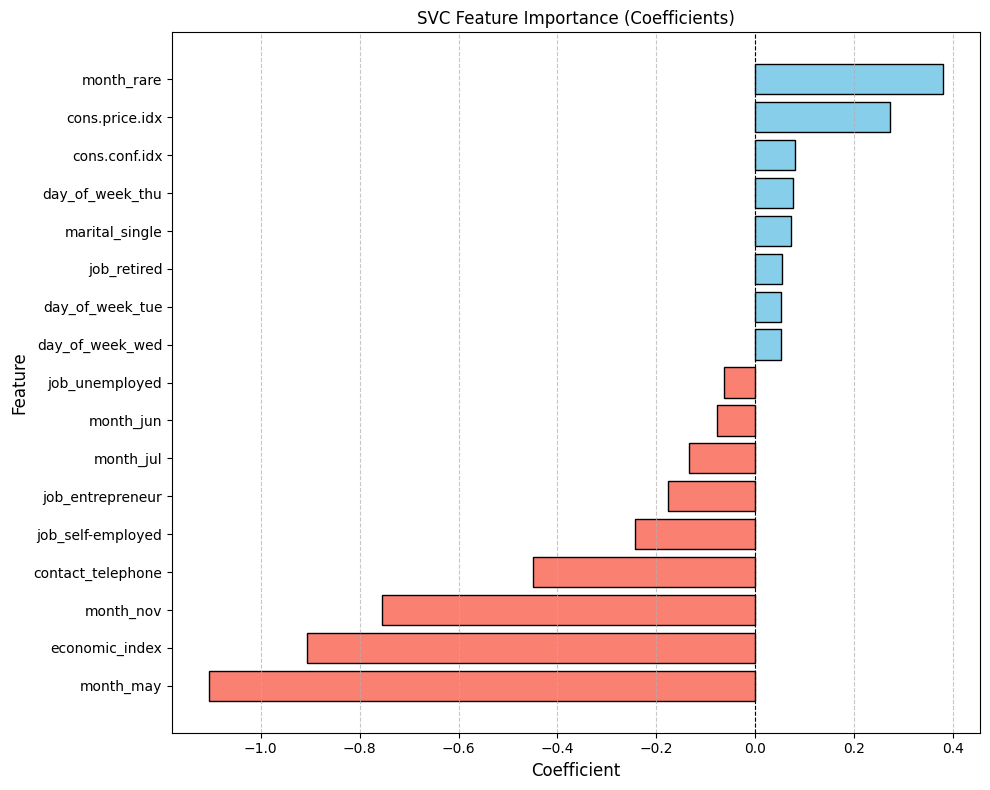

In [230]:
# Plot the important features and coefficients
plt.figure(figsize=(10, 8))
colors = ['salmon' if x < 0 else 'skyblue' for x in plot_svc_df['coef']]
plt.barh(plot_svc_df['feature'], plot_svc_df['coef'], color=colors, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.title('SVC Feature Importance (Coefficients)')
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 **Predicting subscription using the Support Vector Classifier (SVC) model**     
 The first prediction is a **true negative** (predicted negative while actually negative) while the second prediction is a **false negative** (predicted negative while actually positive).

In [231]:
# Obtain a sample from the test data
df_test5 = X_test[2503:2504]

print(df_test5.head().T, '\n')
print(f'The actual subscription is {list(y_test[2503:2504])[0]}') # verify subscription

                            13055
age                            35
job                        admin.
marital                   married
education       university.degree
default                        no
housing                        no
loan                           no
contact                  cellular
month                         jul
day_of_week                   tue
campaign                        2
pdays                         999
previous                        0
poutcome              nonexistent
cons.price.idx             93.918
cons.conf.idx               -42.7
economic_index           0.786153 

The actual subscription is 0


In [232]:
# Transfer the data to a dictionary
sample5 = {
    "age": 35,
    "job": "admin.",
    "marital": "married",
    "education": "university.degree",
    "default": "no",
    "housing": "no",
    "loan": "no",
    "contact": "cellular",
    "month": "jul",
    "day_of_week": "tue",
    "campaign": 2,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.918,
    "cons.conf.idx": -42.7,
    "economic_index": 0.786153
}

In [233]:
# Predict subscription score
raw_score = svc_pipe2_opt.decision_function(pd.DataFrame([sample5]))

if raw_score >= 0.25:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted score is {raw_score[0]:.2f}')

Predicted subscription is 0 

The predicted score is -0.93


In [234]:
# Obtain a sample from the test data
df_test4 = X_test[3013:3014]

print(df_test4.head().T, '\n')
print(f'The actual subscription is {list(y_test[3013:3014])[0]}') # verify subscription

                              15912
age                              28
job                      technician
marital                      single
education       professional.course
default                          no
housing                         yes
loan                             no
contact                    cellular
month                           jul
day_of_week                     mon
campaign                          3
pdays                           999
previous                          0
poutcome                nonexistent
cons.price.idx               93.918
cons.conf.idx                 -42.7
economic_index              0.75508 

The actual subscription is 1


In [235]:
# Transfer the data to a dictionary
sample4 = {
    "age": 28,
    "job": "technician",
    "marital": "single",
    "education": "professional.course",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "jul",
    "day_of_week": "mon",
    "campaign": 3,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "cons.price.idx": 93.918,
    "cons.conf.idx": -42.7,
    "economic_index": 0.75508
}

In [236]:
# Predict subscription score
pred2_svc_pipe2 = svc_pipe2_opt.decision_function(pd.DataFrame([sample4]))

if pred2_svc_pipe2 >= 0.25:
    print(f'Predicted subscription is 1 \n')
else:
    print(f'Predicted subscription is 0 \n')

print(f'The predicted subscription score is {pred2_svc_pipe2[0]:.2f}')

Predicted subscription is 0 

The predicted subscription score is -0.82


**Build the four (4) models comparison dataframe and evaluate the models**    

In [237]:
# Build the dataframe
comparison_models_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Classifier'],
    'Accuracy': [accuracy_L3, accuracy_D3, accuracy_K3, accuracy_S3],
    'Precision': [precision_L3, precision_D3, precision_K3, precision_S3],
    'Recall': [recall_L3, recall_D3, recall_K3, recall_S3],
    'F2 Score': [F2_score_L3, F2_score_D3, F2_score_K3, F2_score_S3],
    'AUC': [roc_auc_score(y_test, y_probs_L2), roc_auc_score(y_test, y_probs_D2), roc_auc_score(y_test, y_probs_K2),
            roc_auc_score(y1_test, y_probs_S2)],
    'Profit/Loss': [Profit_Loss_L3, Profit_Loss_D3, Profit_Loss_K3, Profit_Loss_S3]
})
comparison_models_df

,Model,Accuracy,Precision,Recall,F2 Score,AUC,Profit/Loss
0,Logistic Regression,0.625139,0.174881,0.720524,0.443668,0.725717,-12220.00000
1,Decision Tree,0.445161,0.138751,0.853712,0.420430,0.738753,-7080.00000
2,K-Nearest Neighbors,0.497219,0.139600,0.762009,0.402816,0.678902,-30000.00000
3,Support Vector Classifier,0.746331,0.251572,0.952381,0.611621,0.905008,89179.54698


**Provide an interactive plot of the models performance metrics**

In [238]:
# Provide an interactive Plotly plot
fig = go.Figure()

# Primary y-axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F2 Score', 'AUC']

for metric in metrics:
    fig.add_trace(
        go.Scatter(
          x=comparison_models_df['Model'],
          y=comparison_models_df[metric],
          mode='lines+markers',
          name=metric,
          yaxis='y1'
        )
    )

# Secondary y-axis
fig.add_trace(
        go.Bar(
          x=comparison_models_df['Model'],
          y=comparison_models_df['Profit/Loss'],
          name='Profit/Loss',
          yaxis='y2',
          opacity=0.35
        )
)
# Layout
fig.update_layout(
        title='Model Performance and Profit/Loss',
        xaxis=dict(title='Model'),
        yaxis=dict(
            title='Score',
            range=[0, 1]
        ),
        yaxis2=dict(
            title='Profit/Loss ($)',
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        template='plotly_white',
        hovermode='x unified'
)
fig.show()

**Findings**     
Based on the comparison using the metrics of accuracy, precision, recall, F2 score, AUC and Profit/Loss, the **Support Vector Classifier (SVC)** is the clear winner being ahead in all of the metrics especially on **AUC**.
Given the asssumed lifetime value and cost of subscription, only the SVC model is making money.

**AUC** (Area Under Curve) is the ability to distinguish between the positive (subscription) and negative (no subscription) classes across the thresholds. AUC = 0.5 is random guessing while AUC = 1.0 is perfect separation of the classes. This means that the closer the model is to 1.0 the better it is in picking the positive class. With the highest **AUC**, the **SVC** model is able to identify clients who are subscribing better than the other models.

With regard to **feature importance**, the four models generally are in agreement that macroeconomics (e.g., euribor rate, consumer confidence index, consumer price index, timing of campaign) rather than demographics (e.g., age, marital status, job, education) influence subscription the most.

**Next steps and recommendations**
- continue model development to include identification of clients who are likely to subscribe to a term deposit
- deploy the model for use by marketing teams for sales campaigns and by the leadership for strategic planning and forecasting
- calculate realistic assumptions on the cost of subscription and potential gains for budget purposes and for tuning the profit/loss analysis
- tune the threshold according to the relative cost of subscription and potential gains    
- continue model development to validate the features relative importance to guide management on which features need to be given particular attention in order to optimize subscription

##### Questions